In [1]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import warnings
from utils import *
sns.set_theme(style="darkgrid", palette="pastel")
sns.color_palette("Set2")
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

df = pd.read_csv("data/data.csv",encoding='ISO-8859-1') 
df.head(10)

Price     Category            Boat Type          Manufacturer  \
0   CHF 3.337,-  Power Boats          Motor Yacht  Rigiflex power boats   
1   EUR 3.490,-  Power Boats  Center console boat     Terhi power boats   
2   CHF 3.770,-  Power Boats           Sport Boat    Marine power boats   
3  DKK 25.900,-  Power Boats           Sport Boat    Pioner power boats   
4  SEK 35.000,-  Power Boats              Classic                   NaN   
5   EUR 3.399,-  Power Boats         Fishing Boat    Linder power boats   
6   CHF 3.650,-  Power Boats           Sport Boat    Linder power boats   
7   CHF 3.600,-  Power Boats            Catamaran                   NaN   
8  DKK 24.800,-  Power Boats           Sport Boat                   NaN   
9   EUR 3.333,-  Power Boats         Fishing Boat  Crescent power boats   

                         Model Boat name                 Type  Year Built  \
0                      CAP 400       NaN  new boat from stock      2017.0   
1                        400 C       NaN  new boat from stock      2020.0   
2              370 S - Aluboot       NaN  new boat from stock         NaN   
3   10 Classic Special Edition       NaN  new boat from stock      2020.0   
4           Gullholmensnipa 21       NaN            Used boat      1974.0   
5                355 Sportsman       NaN  new boat from stock      2019.0   
6  Fishing 410 (Aluminiumboot)       NaN  new boat from stock         NaN   
7             Stoll SA Yverdon       NaN   Used boat,Unleaded      1999.0   
8                    Crazy One       NaN            Used boat         NaN   
9            364 Rodd 2.5 Pack       NaN  new boat from stock      2019.0   

      Condition  Length   Width   Depth Displacement CE Design Category  \
0        as new  4.00 m  1.90 m     NaN          NaN                NaN   
1           new  4.00 m  1.50 m     NaN       150 kg                NaN   
2           NaN  3.69 m  1.42 m  0.25 m          NaN                NaN   
3           NaN  3.00 m  1.00 m     NaN       110 kg                NaN   
4          good  6.30 m  2.50 m  0.75 m     2'000 kg                NaN   
5           new  3.55 m  1.46 m     NaN        84 kg                NaN   
6           NaN  4.03 m  1.56 m     NaN        75 kg                NaN   
7  well-groomed  6.20 m  2.38 m  0.40 m       350 kg                NaN   
8           NaN  3.00 m     NaN     NaN        75 kg                NaN   
9           NaN  3.64 m  1.37 m     NaN        77 kg                NaN   

   Cert Number of People  Number of Cabins  Number of beds   Hull Color  \
0                    7.0               NaN             NaN        white   
1                    NaN               NaN             NaN          NaN   
2                    4.0               NaN             NaN          NaN   
3                    NaN               NaN             NaN          NaN   
4                    NaN               NaN             2.0          NaN   
5                    4.0               NaN             NaN          NaN   
6                    3.0               NaN             NaN          NaN   
7                    6.0               NaN             NaN          NaN   
8                    NaN               NaN             NaN          NaN   
9                    NaN               NaN             NaN  white white   

   Number of Toilets  Number of Bathrooms  Number of Showers       Material  \
0                NaN                  NaN                NaN            NaN   
1                NaN                  NaN                NaN  Thermoplastic   
2                NaN                  NaN                NaN      Aluminium   
3                NaN                  NaN                NaN            NaN   
4                NaN                  NaN                NaN            NaN   
5                NaN                  NaN                NaN      Aluminium   
6                NaN                  NaN                NaN      Aluminium   
7                NaN                  NaN           

In [2]:
df.describe()

Year Built  Cert Number of People  Number of Cabins  Number of beds  \
count  9777.000000            3597.000000       6475.000000     6407.000000   
mean   2004.830725               9.355296          2.149035        4.345716   
std      16.309045              24.037107          2.145005        3.974223   
min    1885.000000               1.000000         -1.000000      -23.000000   
25%    1999.000000               7.000000          1.000000        2.000000   
50%    2008.000000               8.000000          2.000000        4.000000   
75%    2017.000000              10.000000          3.000000        6.000000   
max    2021.000000            1200.000000         96.000000      266.000000   

       Number of Toilets  Number of Bathrooms  Number of Showers  
count        2156.000000           463.000000        1941.000000  
mean            1.763915             1.289417           1.550747  
std             2.076365             0.653360           0.930096  
min             1.000000             1.000000           1.000000  
25%             1.000000             1.000000           1.000000  
50%             1.000000             1.000000           1.000000  
75%             2.000000             1.000000           2.000000  
max            84.000000             6.000000          10.000000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        10344 non-null  object 
 1   Category                     10344 non-null  object 
 2   Boat Type                    10344 non-null  object 
 3   Manufacturer                 8954 non-null   object 
 4   Model                        10341 non-null  object 
 5   Boat name                    1313 non-null   object 
 6   Type                         10339 non-null  object 
 7   Year Built                   9777 non-null   float64
 8   Condition                    3375 non-null   object 
 9   Length                       10334 non-null  object 
 10  Width                        10281 non-null  object 
 11  Depth                        7234 non-null   object 
 12  Displacement                 5051 non-null   object 
 13  CE Design Catego

In [4]:
df[df.duplicated()]

Price     Category Boat Type Manufacturer                Model  \
24  EUR 4.000,-  Power Boats    Launch          NaN  Zaccagnino ANACONDA   

   Boat name       Type  Year Built Condition  Length   Width Depth  \
24       NaN  Used boat      1984.0       NaN  6.00 m  2.20 m   NaN   

   Displacement CE Design Category  Cert Number of People  Number of Cabins  \
24          NaN                NaN                    NaN               NaN   

    Number of beds Hull Color  Number of Toilets  Number of Bathrooms  \
24             NaN        NaN                NaN                  NaN   

    Number of Showers Material Fresh Water Cap Holding Tank Propulsion Engine  \
24                NaN      GRP             NaN          NaN        NaN   Buck   

   Engine Performance Fuel Capacity Fuel Type Engine Hours Max Speed  \
24  1 x 20 HP / 15 kW          50 l       NaN          NaN       NaN   

   Cruising Speed                     Location Advertisement Date  \
24            NaN  Italy Â» Toscana Â» Toscana                NaN   

   Number of views last 7 days Comments Additional Comments Equipment  
24                         NaN      NaN                 NaN       NaN

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.nunique()

Price                          3283
Category                          1
Boat Type                       135
Manufacturer                    932
Model                          7458
Boat name                      1258
Type                             36
Year Built                      121
Condition                        10
Length                         1628
Width                           580
Depth                           264
Displacement                   1380
CE Design Category                4
Cert Number of People            25
Number of Cabins                 17
Number of beds                   22
Hull Color                      377
Number of Toilets                11
Number of Bathrooms               5
Number of Showers                 9
Material                         11
Fresh Water Cap                 287
Holding Tank                    104
Propulsion                        8
Engine                         4752
Engine Performance              843
Fuel Capacity               

## Feature Engineering

In [7]:
df = df.rename(columns= lambda x: x.replace(" ", "_").lower())
df.columns

Index(['price', 'category', 'boat_type', 'manufacturer', 'model', 'boat_name',
       'type', 'year_built', 'condition', 'length', 'width', 'depth',
       'displacement', 'ce_design_category', 'cert_number_of_people',
       'number_of_cabins', 'number_of_beds', 'hull_color', 'number_of_toilets',
       'number_of_bathrooms', 'number_of_showers', 'material',
       'fresh_water_cap', 'holding_tank', 'propulsion', 'engine',
       'engine_performance', 'fuel_capacity', 'fuel_type', 'engine_hours',
       'max_speed', 'cruising_speed', 'location', 'advertisement_date',
       'number_of_views_last_7_days', 'comments', 'additional_comments',
       'equipment'],
      dtype='object')

In [8]:
df = df.drop('category', axis=1)

Dropping **category** since it has only one column

### Currency and Price columns

In [9]:
df["currency"] = df.price.apply(lambda x : x.split(" ")[0])
df.price = df.price.apply(lambda x : x.split(" ")[1])
df["currency"].value_counts()

currency
EUR      8699
CHF      1036
Â£        306
DKK       183
Price      44
USD        39
SEK        36
Name: count, dtype: int64

In [10]:
price_rows = df[df['currency'] == 'Price'].head(5)
price_rows

price    boat_type                   manufacturer  \
909     on   Sport Boat           Stingray power boats   
2818    on  Motor Yacht           Euroship power boats   
3471    on      Hardtop                            NaN   
3472    on   Cabin Boat  Alfastreet Marine power boats   
3473    on      Classic              Marex power boats   

                                 model boat_name  \
909                              225SX       NaN   
2818           classic kotter OK 13.50       NaN   
3471        Multiyacht Compositi 78 HT       NaN   
3472  28 CABIN ELECTRIC 2xENGINE 10 kW       NaN   
3473                         Dixi 2100       NaN   

                              type  year_built     condition   length   width  \
909             Used boat,Unleaded      2012.0     very good   6.99 m  2.52 m   
2818              Used boat,Diesel      2009.0  well-groomed  13.85 m  4.46 m   
3471              Used boat,Diesel      2003.0           NaN  23.60 m  5.60 m   
3472  new boat from stock,Electric      2020.0           new   9.84 m  2.97 m   
3473                     Used boat      2007.0          good   6.25 m  2.50 m   

       depth displacement ce_design_category  cert_number_of_people  \
909      NaN          NaN        C - Inshore                   10.0   
2818  1.28 m    24'000 kg       B - Offshore                   10.0   
3471  1.00 m     55000 kg                NaN                   18.0   
3472  0.75 m          NaN        C - Inshore                   10.0   
3473     NaN       500 kg                NaN                    7.0   

      number_of_cabins  number_of_beds   hull_color  number_of_toilets  \
909                1.0             NaN          NaN                NaN   
2818               2.0             2.0          NaN                NaN   
3471               3.0             4.0       Bianco                NaN   
3472               1.0             2.0  white white                1.0   
3473               1.0             3.0          NaN                NaN   

      number_of_bathrooms  number_of_showers material fresh_water_cap  \
909                   NaN                NaN      GRP             NaN   
2818                  1.0                NaN    Steel           810 l   
3471                  NaN                NaN      NaN             NaN   
3472                  NaN                1.0      GRP           117 l   
3473                  NaN                NaN      NaN            80 l   

     holding_tank          propulsion                        engine  \
909           NaN          Sterndrive           Volvo Penta 5.7 Gxi   
2818        450 l  Inboard with Shaft  IVECON N69 NMA M15.30 150 PK   
3471          NaN                 NaN                   MTU M91 V12   
3472          NaN           POD Drive                     Piktronik   
3473          NaN                 NaN            Volvo Penta AQ 211   

         engine_performance fuel_capacity fuel_type engine_hours max_speed  \
909     1 x 325 HP / 239 kW           NaN  Unleaded        145 h       NaN   
2818    1 x 150 HP / 110 kW        1900 l    Diesel       2980 h       NaN   
3471  2 x 1500 HP / 1103 kW        6000 l    Diesel       1100 h       NaN   
3472                    NaN           NaN  Electric          NaN   14 km/h   
3473    1 x 190 HP / 140 kW         200 l       NaN          NaN       NaN   

     cruising_speed                                      location  \
909             NaN  Switzerland Â» VierwaldstÃ¤ttersee Â» Sursee   
2818            NaN      Netherlands Â» SÃ¼dholland Â» Numansdorp   
3471            NaN                          Italy Â» Mar Tirreno   
3472         9 km/h                      United Kingdom Â» Marlow   
3473            NaN        Switzerland Â» Lago Maggiore Â» Iragna   

     advertisement_date number_of_views_last_7_days  \
909          31.05.2020                         483   
2818         01.06.2020                         191   
3471                NaN                          74   
3472          

The 'Price' value in the **currency** columns seems that it's not numerical thus it can be deleted.

In [11]:
df = df[df['currency'] != 'Price']
df["currency"].value_counts()

currency
EUR    8699
CHF    1036
Â£      306
DKK     183
USD      39
SEK      36
Name: count, dtype: int64

In [12]:
df['price'] = df['price'].str.replace(',-', '')
df['price'] = df['price'].str.replace('.', '').astype(float)
df.head(5)

price            boat_type          manufacturer  \
0   3337.0          Motor Yacht  Rigiflex power boats   
1   3490.0  Center console boat     Terhi power boats   
2   3770.0           Sport Boat    Marine power boats   
3  25900.0           Sport Boat    Pioner power boats   
4  35000.0              Classic                   NaN   

                        model boat_name                 type  year_built  \
0                     CAP 400       NaN  new boat from stock      2017.0   
1                       400 C       NaN  new boat from stock      2020.0   
2             370 S - Aluboot       NaN  new boat from stock         NaN   
3  10 Classic Special Edition       NaN  new boat from stock      2020.0   
4          Gullholmensnipa 21       NaN            Used boat      1974.0   

  condition  length   width   depth displacement ce_design_category  \
0    as new  4.00 m  1.90 m     NaN          NaN                NaN   
1       new  4.00 m  1.50 m     NaN       150 kg                NaN   
2       NaN  3.69 m  1.42 m  0.25 m          NaN                NaN   
3       NaN  3.00 m  1.00 m     NaN       110 kg                NaN   
4      good  6.30 m  2.50 m  0.75 m     2'000 kg                NaN   

   cert_number_of_people  number_of_cabins  number_of_beds hull_color  \
0                    7.0               NaN             NaN      white   
1                    NaN               NaN             NaN        NaN   
2                    4.0               NaN             NaN        NaN   
3                    NaN               NaN             NaN        NaN   
4                    NaN               NaN             2.0        NaN   

   number_of_toilets  number_of_bathrooms  number_of_showers       material  \
0                NaN                  NaN                NaN            NaN   
1                NaN                  NaN                NaN  Thermoplastic   
2                NaN                  NaN                NaN      Aluminium   
3                NaN                  NaN                NaN            NaN   
4                NaN                  NaN                NaN            NaN   

  fresh_water_cap holding_tank          propulsion  \
0             NaN          NaN                 NaN   
1             NaN          NaN                 NaN   
2             NaN          NaN                 NaN   
3             NaN          NaN                 NaN   
4             NaN          NaN  Inboard with Shaft   

                                engine engine_performance fuel_capacity  \
0                                  NaN                NaN           NaN   
1                                  NaN                NaN           NaN   
2   (Permission for Lake of Constance)                NaN           NaN   
3                                  NaN                NaN           NaN   
4                   VolvoPenta MD 2002  1 x 18 HP / 13 kW          50 l   

  fuel_type engine_hours max_speed cruising_speed  \
0       NaN          NaN       NaN            NaN   
1       NaN          NaN       NaN            NaN   
2       NaN          NaN       NaN            NaN   
3       NaN          NaN       NaN            NaN   
4       NaN        500 h       NaN            NaN   

                                     location advertisement_date  \
0      Switzerland Â» Lake Geneva Â» VÃ©senaz                NaN   
1                    Germany Â» BÃ¶nningstedt                NaN   
2  Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH                NaN   
3                        Denmark Â» Svendborg                NaN   
4                Nordsee Â» VÃ¤stra FrÃ¶lunda         04.07.2020   

  number_of_views_last_7_days  \
0                         226   
1                          75   
2                         124   
3                          64   
4                         131   

                                            comments  \
0                                                NaN   
1  In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a

In [13]:
exchange_rates = {
    'EUR': 1.0,
    'CHF': 1.02,
    'Â£': 1.16,
    'DKK': 0.13,
    'USD': 0.94,
    'SEK': 0.086
}

def convert_to_euro(row):
    if row['currency'] == 'EUR':
        return row['price']
    else:
        return row['price'] * exchange_rates[row['currency']]

df['target'] = df.apply(convert_to_euro, axis=1)
df = df.drop(['price', 'currency'], axis=1)

df.head(5)

boat_type          manufacturer                       model  \
0          Motor Yacht  Rigiflex power boats                     CAP 400   
1  Center console boat     Terhi power boats                       400 C   
2           Sport Boat    Marine power boats             370 S - Aluboot   
3           Sport Boat    Pioner power boats  10 Classic Special Edition   
4              Classic                   NaN          Gullholmensnipa 21   

  boat_name                 type  year_built condition  length   width  \
0       NaN  new boat from stock      2017.0    as new  4.00 m  1.90 m   
1       NaN  new boat from stock      2020.0       new  4.00 m  1.50 m   
2       NaN  new boat from stock         NaN       NaN  3.69 m  1.42 m   
3       NaN  new boat from stock      2020.0       NaN  3.00 m  1.00 m   
4       NaN            Used boat      1974.0      good  6.30 m  2.50 m   

    depth displacement ce_design_category  cert_number_of_people  \
0     NaN          NaN                NaN                    7.0   
1     NaN       150 kg                NaN                    NaN   
2  0.25 m          NaN                NaN                    4.0   
3     NaN       110 kg                NaN                    NaN   
4  0.75 m     2'000 kg                NaN                    NaN   

   number_of_cabins  number_of_beds hull_color  number_of_toilets  \
0               NaN             NaN      white                NaN   
1               NaN             NaN        NaN                NaN   
2               NaN             NaN        NaN                NaN   
3               NaN             NaN        NaN                NaN   
4               NaN             2.0        NaN                NaN   

   number_of_bathrooms  number_of_showers       material fresh_water_cap  \
0                  NaN                NaN            NaN             NaN   
1                  NaN                NaN  Thermoplastic             NaN   
2                  NaN                NaN      Aluminium             NaN   
3                  NaN                NaN            NaN             NaN   
4                  NaN                NaN            NaN             NaN   

  holding_tank          propulsion                               engine  \
0          NaN                 NaN                                  NaN   
1          NaN                 NaN                                  NaN   
2          NaN                 NaN   (Permission for Lake of Constance)   
3          NaN                 NaN                                  NaN   
4          NaN  Inboard with Shaft                   VolvoPenta MD 2002   

  engine_performance fuel_capacity fuel_type engine_hours max_speed  \
0                NaN           NaN       NaN          NaN       NaN   
1                NaN           NaN       NaN          NaN       NaN   
2                NaN           NaN       NaN          NaN       NaN   
3                NaN           NaN       NaN          NaN       NaN   
4  1 x 18 HP / 13 kW          50 l       NaN        500 h       NaN   

  cruising_speed                                    location  \
0            NaN      Switzerland Â» Lake Geneva Â» VÃ©senaz   
1            NaN                    Germany Â» BÃ¶nningstedt   
2            NaN  Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH   
3            NaN                        Denmark Â» Svendborg   
4            NaN                Nordsee Â» VÃ¤stra FrÃ¶lunda   

  advertisement_date number_of_views_last_7_days  \
0                NaN                         226   
1                NaN                          75   
2                NaN                         124   
3                NaN                          64   
4         04.07.2020                         131   

                                            comments  \
0                                                NaN   
1  In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...   
2                                                NaN   
3  MORSOM OG LETKÃRT KVALITET

Stored the price values in the **target** column after I converted all values in euros (since most of the countries are from Europe)

### Boat Types

In [14]:
boat_types_series = df['boat_type'].str.split(',', expand=True).stack()

unique_counts = boat_types_series.value_counts().to_dict()

unique_counts.keys()

dict_keys(['Motor Yacht', 'Sport Boat', 'Flybridge', 'Trawler', 'Cabin Boat', 'Pilothouse', 'Hardtop', 'Center console boat', 'Bowrider', 'Deck Boat', 'Classic', 'Fishing Boat', 'House Boat', 'Runabout', 'Mega Yacht', 'Pontoon Boat', 'Wakeboard/Wakesurf', 'Launch', 'Offshore Boat', 'Working Boat', 'Passenger boat', 'Catamaran', 'Water ski', 'Motorsailer', 'Ketch', 'RIB'])

In [15]:
priority_groups = {
    'Luxury Yacht': ['Mega Yacht', 'Motor Yacht', 'Flybridge'],
    'Sport and Leisure Boat': ['Sport Boat', 'Cabin Boat', 'Hardtop', 'Center console boat', 'Bowrider', 'Deck Boat', 'Runabout', 'Wakeboard/Wakesurf', 'Launch', 'Pontoon Boat'],
    'Fishing Boat': ['Trawler', 'Pilothouse', 'Classic', 'Fishing Boat'],
    'Specialized Boat': ['Offshore Boat', 'Working Boat', 'RIB'],
    'Passenger Boat': ['Passenger boat', 'House Boat'],
    'Other': ['Catamaran', 'Water ski', 'Motorsailer', 'Ketch']
}

def classify_boat_type(boat_types):
    counts = {group: 0 for group in priority_groups}
    for boat_type in boat_types:
        for group, types in priority_groups.items():
            if boat_type in types:
                counts[group] += 1

    max_count = max(counts.values())
    max_groups = [group for group, count in counts.items() if count == max_count]
    return max_groups[0] 

df['classified_boat_type'] = df['boat_type'].str.split(',').apply(classify_boat_type)
df = df.drop('boat_type', axis=1)
df.head()

manufacturer                       model boat_name  \
0  Rigiflex power boats                     CAP 400       NaN   
1     Terhi power boats                       400 C       NaN   
2    Marine power boats             370 S - Aluboot       NaN   
3    Pioner power boats  10 Classic Special Edition       NaN   
4                   NaN          Gullholmensnipa 21       NaN   

                  type  year_built condition  length   width   depth  \
0  new boat from stock      2017.0    as new  4.00 m  1.90 m     NaN   
1  new boat from stock      2020.0       new  4.00 m  1.50 m     NaN   
2  new boat from stock         NaN       NaN  3.69 m  1.42 m  0.25 m   
3  new boat from stock      2020.0       NaN  3.00 m  1.00 m     NaN   
4            Used boat      1974.0      good  6.30 m  2.50 m  0.75 m   

  displacement ce_design_category  cert_number_of_people  number_of_cabins  \
0          NaN                NaN                    7.0               NaN   
1       150 kg                NaN                    NaN               NaN   
2          NaN                NaN                    4.0               NaN   
3       110 kg                NaN                    NaN               NaN   
4     2'000 kg                NaN                    NaN               NaN   

   number_of_beds hull_color  number_of_toilets  number_of_bathrooms  \
0             NaN      white                NaN                  NaN   
1             NaN        NaN                NaN                  NaN   
2             NaN        NaN                NaN                  NaN   
3             NaN        NaN                NaN                  NaN   
4             2.0        NaN                NaN                  NaN   

   number_of_showers       material fresh_water_cap holding_tank  \
0                NaN            NaN             NaN          NaN   
1                NaN  Thermoplastic             NaN          NaN   
2                NaN      Aluminium             NaN          NaN   
3                NaN            NaN             NaN          NaN   
4                NaN            NaN             NaN          NaN   

           propulsion                               engine engine_performance  \
0                 NaN                                  NaN                NaN   
1                 NaN                                  NaN                NaN   
2                 NaN   (Permission for Lake of Constance)                NaN   
3                 NaN                                  NaN                NaN   
4  Inboard with Shaft                   VolvoPenta MD 2002  1 x 18 HP / 13 kW   

  fuel_capacity fuel_type engine_hours max_speed cruising_speed  \
0           NaN       NaN          NaN       NaN            NaN   
1           NaN       NaN          NaN       NaN            NaN   
2           NaN       NaN          NaN       NaN            NaN   
3           NaN       NaN          NaN       NaN            NaN   
4          50 l       NaN        500 h       NaN            NaN   

                                     location advertisement_date  \
0      Switzerland Â» Lake Geneva Â» VÃ©senaz                NaN   
1                    Germany Â» BÃ¶nningstedt                NaN   
2  Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH                NaN   
3                        Denmark Â» Svendborg                NaN   
4                Nordsee Â» VÃ¤stra FrÃ¶lunda         04.07.2020   

  number_of_views_last_7_days  \
0                         226   
1                          75   
2                         124   
3                          64   
4                         131   

                                            comments  \
0                                                NaN   
1  In den Farben weiÃ oder grÃ¼n lieferbar.,,2 a...   
2                                                NaN   
3  MORSOM OG LETKÃRT KVALITETSBÃ
D!,Nye Pioner 1...   
4                                                NaN   

                                 addition

For the **boat_type** I made 6 big groups and classified every one of them in these 6 groups.

### Location / Manufacturer / Boat name / Model

In [16]:
df['location'] = df['location'].apply(lambda x: x.split(' Â» ')[0] if isinstance(x, str) else x)

unique_locations = df['location'].dropna().unique()
unique_locations

array(['Switzerland', 'Germany', 'Denmark', 'Nordsee', 'Italy', 'France',
       'United Kingdom', 'Spain', 'Austria', 'Netherlands', 'Slovenia',
       'Serbia', 'Finland', 'Belgium', 'Slovak Republic',
       'Croatia (Hrvatska)', 'Portugal', 'Malta', 'Sweden', 'Montenegro',
       'Latvia', 'Rovinij', 'Steinwiesen', 'Greece', 'Rolle', 'Poland',
       'baden baden', 'Donau', 'TravemÃ¼nde ', 'Lake Constance', 'Turkey',
       'Stralsund ', 'Rostock ', 'Lake Geneva', 'Split', 'lago maggiore',
       'BelgiÃ«, Zulte ', 'Niederrhein', 'Hungary',
       'Brandenburg an derHavel', 'RÃ¼gen', 'Zevenbergen', 'Oder', 'st',
       'Cyprus', 'Faoug', 'Beilngries ', 'Czech Republic', 'Lithuania',
       'United States', 'Marina Punat', 'Ukraine',
       'French Southern Territories', 'Italien ', 'Brandenburg ', 'Zadar',
       'Estonia', 'Virgin Islands (British)', 'Monaco',
       'Russian Federation', 'waren mÃ¼ritz ', 'South Africa', 'Egypt',
       'Jersey', 'United Arab Emirates', 'Australi

In [17]:
df['manufacturer'].unique()[:10]

array(['Rigiflex power boats', 'Terhi power boats', 'Marine power boats',
       'Pioner power boats', nan, 'Linder power boats',
       'Crescent power boats', 'Whaly power boats',
       'Four Winns power boats', 'GS Nautica power boats'], dtype=object)

In [18]:
df['boat_name'].unique()[:10]

array([nan, "L'ANTONIN", 'schÃ¶ner IBIS II mit fÃ¼hrerschein',
       'Hille Roda 16, nettes Einsteiger', 'Betty Jean',
       'Fletcher Arrowflyte mit Johnson', 'NOSY IRANJA', 'Deviatie',
       'Crescent Ryds mit 90 PS Honda in', 'Avalon'], dtype=object)

In [19]:
df['model'].unique()[:10]

array(['CAP 400', '400 C', '370 S - Aluboot',
       '10 Classic Special Edition', 'Gullholmensnipa 21',
       '355 Sportsman', 'Fishing 410 (Aluminiumboot)', 'Stoll SA Yverdon',
       'Crazy One', '364 Rodd 2.5 Pack'], dtype=object)

Since there are a lot of classes, and mainly these classes can be determined using other more specific features, it would be logical do delete these ones.

### Type

In [20]:
df["type"].value_counts()

type
Used boat,Diesel                 4189
Used boat,Unleaded               1639
Used boat                        1521
new boat from stock,Unleaded     1119
new boat from stock               671
new boat from stock,Diesel        293
new boat on order,Unleaded        149
, ,Used boat,Unleaded             113
, ,Used boat,Diesel                86
Display Model,Unleaded             75
new boat on order                  62
new boat on order,Diesel           61
Diesel                             59
, ,, ,Used boat,Unleaded           52
, ,Used boat                       30
, ,, ,Used boat,Diesel             27
Unleaded                           27
Used boat,Electric                 23
Display Model,Diesel               19
Display Model                      18
new boat from stock,Electric       18
Used boat,Gas                      13
Display Model,Electric              6
, ,, ,Used boat                     5
, ,Used boat,Electric               4
,                                   2
, ,Disp

In [21]:
df["fuel_type"].value_counts()

fuel_type
Diesel      4734
Unleaded    3177
Electric      54
Gas           16
Hybrid         2
Propane        1
Name: count, dtype: int64

Since there is a **condition** column, where we have more classes for every boat, and we have **fuel_type** which is the fuel, there won't be a need for the **type** column.

In [22]:
df = df.drop(['model', 'comments','boat_name','manufacturer','location','type'], axis=1)

In [23]:
df.head(20)

year_built     condition  length   width   depth displacement  \
0       2017.0        as new  4.00 m  1.90 m     NaN          NaN   
1       2020.0           new  4.00 m  1.50 m     NaN       150 kg   
2          NaN           NaN  3.69 m  1.42 m  0.25 m          NaN   
3       2020.0           NaN  3.00 m  1.00 m     NaN       110 kg   
4       1974.0          good  6.30 m  2.50 m  0.75 m     2'000 kg   
5       2019.0           new  3.55 m  1.46 m     NaN        84 kg   
6          NaN           NaN  4.03 m  1.56 m     NaN        75 kg   
7       1999.0  well-groomed  6.20 m  2.38 m  0.40 m       350 kg   
8          NaN           NaN  3.00 m     NaN     NaN        75 kg   
9       2019.0           NaN  3.64 m  1.37 m     NaN        77 kg   
10      2018.0           new  4.35 m  1.73 m     NaN       184 kg   
11      1991.0          good  5.60 m  2.20 m     NaN          NaN   
12      1987.0          good  4.35 m  1.75 m     NaN          NaN   
13         NaN           NaN  4.13 m  1.41 m     NaN        59 kg   
14      2004.0          good  4.70 m  2.00 m     NaN          NaN   
15      2020.0           new  4.40 m  1.65 m  0.72 m          NaN   
16      1997.0     very good  3.72 m  1.33 m     NaN          NaN   
17         NaN          used  5.20 m  1.80 m     NaN          NaN   
18         NaN           new  3.88 m  1.49 m     NaN       119 kg   
19         NaN           NaN  4.31 m  1.64 m     NaN        94 kg   

   ce_design_category  cert_number_of_people  number_of_cabins  \
0                 NaN                    7.0               NaN   
1                 NaN                    NaN               NaN   
2                 NaN                    4.0               NaN   
3                 NaN                    NaN               NaN   
4                 NaN                    NaN               NaN   
5                 NaN                    4.0               NaN   
6                 NaN                    3.0               NaN   
7                 NaN                    6.0               NaN   
8                 NaN                    NaN               NaN   
9                 NaN                    NaN               NaN   
10                NaN                   12.0               NaN   
11                NaN                    6.0               NaN   
12                NaN                    4.0               NaN   
13                NaN                    4.0               NaN   
14                NaN                    NaN               NaN   
15                NaN                    NaN               NaN   
16                NaN                    3.0               NaN   
17                NaN                    6.0               NaN   
18                NaN                    3.0               NaN   
19                NaN                    4.0               NaN   

    number_of_beds   hull_color  number_of_toilets  number_of_bathrooms  \
0              NaN        white                NaN                  NaN   
1              NaN          NaN                NaN                  NaN   
2              NaN          NaN                NaN                  NaN   
3              NaN          NaN                NaN                  NaN   
4              2.0          NaN                NaN                  NaN   
5              NaN          NaN                NaN                  NaN   
6              NaN          NaN                NaN                  NaN   
7              NaN          NaN                NaN                  NaN   
8              NaN          NaN                NaN                  NaN   
9              NaN  white white                NaN                  NaN   
10             NaN          NaN                NaN                  NaN   
11             NaN          NaN                NaN                  NaN   
12             NaN          NaN                NaN                  NaN   
13             NaN          NaN                NaN                  NaN   
14             NaN          NaN           

### Measurement columns

#### Fresh Water Cap

In [24]:
df['fresh_water_cap'].unique()[:10]

array([nan, '70 l', '205 l', '100 l', '40 l', '60 l', '80 l', '50 l',
       '250 l', '200 l'], dtype=object)

In [25]:
df['fresh_water_cap(l)'] = df['fresh_water_cap'].str.replace(' l', '').astype(float)

#### Engine Hours

In [26]:
df['engine_hours'].unique()[:10]

array([nan, '500 h', '10 h', '2850 h', '9 h', '20 h', '50 h', '1130 h',
       '3 h', '335 h'], dtype=object)

In [27]:
df['engine_hours(h)'] = df['engine_hours'].str.replace(' h', '').astype(float)

#### Max Speed

In [28]:
df['max_speed'].unique()[:10]

array([nan, '40 mph', '25 knots', '24 knots', '7 knots', '95 km/h',
       '9 km/h', '94 km/h', '22 km/h', '32 knots'], dtype=object)

In [29]:
def convert_to_kmph(speed):
    if pd.isna(speed):
        return speed
    elif 'mph' in speed:
        return int(speed.split(' ')[0]) * 1.60934
    elif 'knots' in speed:
        return int(speed.split(' ')[0]) * 1.852
    elif 'km/h' in speed:
        return int(speed.split(' ')[0])
    else:
        return None

df['max_speed(km/h)'] = df['max_speed'].apply(convert_to_kmph)

#### Cruising Speed

In [30]:
df['cruising_speed'].unique()[:10]

array([nan, '12 knots', '18 knots', '5 knots', '6 km/h', '60 km/h',
       '12 km/h', '24 knots', '26 knots', '25 knots'], dtype=object)

In [31]:
df['cruising_speed(km/h)'] = df['cruising_speed'].apply(convert_to_kmph)

#### Engine Performance

In [32]:
df['engine_performance'].unique()[:10]

array([nan, '1 x 18 HP / 13 kW', '1 x 15 HP / 11 kW', '1 x 2 HP / 1.5 kW',
       '1 x 130 HP / 96 kW', '1 x 1 HP / 0.7 kW', '1 x 6 HP / 4.4 kW',
       '1 x 45 HP / 33 kW', '1 x 40 HP / 29 kW', '1 x 145 HP / 107 kW'],
      dtype=object)

In [33]:
def convert_to_kw(engine_performance):
    if pd.isna(engine_performance):
        return engine_performance
    else:
        hp = float(engine_performance.split(' ')[2])
        return hp * 0.735499

df['engine_performance(kW)'] = df['engine_performance'].apply(convert_to_kw)

#### Displacement

In [34]:
df['displacement'].unique()[:10]

array([nan, '150 kg', '110 kg', "2'000 kg", '84 kg', '75 kg', '350 kg',
       '77 kg', '184 kg', '59 kg'], dtype=object)

In [35]:
df['displacement(kg)'] = df['displacement'].str.replace(" kg", "").str.replace("'", "").astype(float)

#### Width

In [36]:
df['width'].unique()[:10]

array(['1.90 m', '1.50 m', '1.42 m', '1.00 m', '2.50 m', '1.46 m',
       '1.56 m', '2.38 m', nan, '1.37 m'], dtype=object)

In [37]:
df['width(m)'] = df['width'].str.replace(' m', '').astype(float)

#### Depth

In [38]:
df['depth'].unique()[:10]

array([nan, '0.25 m', '0.75 m', '0.40 m', '0.72 m', '0.80 m', '0.45 m',
       '0.20 m', '0.60 m', '0.50 m'], dtype=object)

In [39]:
df['depth(m)'] = df['depth'].str.replace(' m', '').astype(float)

#### Length

In [40]:
df['length'].unique()[:10]

array(['4.00 m', '3.69 m', '3.00 m', '6.30 m', '3.55 m', '4.03 m',
       '6.20 m', '3.64 m', '4.35 m', '5.60 m'], dtype=object)

In [41]:
df['length(m)'] = df['length'].str.replace(' m', '').astype(float)

#### Fuel Capacity

In [42]:
df['fuel_capacity'].unique()[:10]

array([nan, '50 l', '40 l', '80 l', '20 l', '25 l', '160 l', '54 l',
       '12 l', '10 l'], dtype=object)

In [43]:
df['fuel_capacity(l)'] = df['fuel_capacity'].str.replace(' l', '').astype(float)

#### Number of Views Last 7 Days

In [44]:
df['number_of_views_last_7_days'].unique()[:10]

array(['226', '75', '124', '64', '131', '58', '132', '474', '134', '45'],
      dtype=object)

In [45]:
df['number_of_views_last_7_days'] = df['number_of_views_last_7_days'].str.replace("'", "").astype(float)

In [46]:
df = df.drop(['fresh_water_cap', 'engine_hours','max_speed','cruising_speed','engine_performance','displacement','width','depth','length','fuel_capacity'], axis=1)

In [47]:
df.head(5)

year_built condition ce_design_category  cert_number_of_people  \
0      2017.0    as new                NaN                    7.0   
1      2020.0       new                NaN                    NaN   
2         NaN       NaN                NaN                    4.0   
3      2020.0       NaN                NaN                    NaN   
4      1974.0      good                NaN                    NaN   

   number_of_cabins  number_of_beds hull_color  number_of_toilets  \
0               NaN             NaN      white                NaN   
1               NaN             NaN        NaN                NaN   
2               NaN             NaN        NaN                NaN   
3               NaN             NaN        NaN                NaN   
4               NaN             2.0        NaN                NaN   

   number_of_bathrooms  number_of_showers       material holding_tank  \
0                  NaN                NaN            NaN          NaN   
1                  NaN                NaN  Thermoplastic          NaN   
2                  NaN                NaN      Aluminium          NaN   
3                  NaN                NaN            NaN          NaN   
4                  NaN                NaN            NaN          NaN   

           propulsion                               engine fuel_type  \
0                 NaN                                  NaN       NaN   
1                 NaN                                  NaN       NaN   
2                 NaN   (Permission for Lake of Constance)       NaN   
3                 NaN                                  NaN       NaN   
4  Inboard with Shaft                   VolvoPenta MD 2002       NaN   

  advertisement_date  number_of_views_last_7_days  \
0                NaN                        226.0   
1                NaN                         75.0   
2                NaN                        124.0   
3                NaN                         64.0   
4         04.07.2020                        131.0   

                                 additional_comments  \
0  Possibility to arrange it with a complete luxu...   
1                                                NaN   
2  The lightweight and sleek rowing boat for 4 pe...   
3                                                NaN   
4                                                NaN   

                                           equipment   target  \
0                                                NaN  3403.74   
1                                                NaN  3490.00   
2                                                NaN  3845.40   
3                                                NaN  3367.00   
4  Anchor,Battery,Bilge Pump,Bilge pump,Cockpit C...  3010.00   

     classified_boat_type  fresh_water_cap(l)  engine_hours(h)  \
0            Luxury Yacht                 NaN              NaN   
1  Sport and Leisure Boat                 NaN              NaN   
2  Sport and Leisure Boat                 NaN              NaN   
3  Sport and Leisure Boat                 NaN              NaN   
4            Fishing Boat                 NaN            500.0   

   max_speed(km/h)  cruising_speed(km/h)  engine_performance(kW)  \
0              NaN                   NaN                     NaN   
1              NaN                   NaN                     NaN   
2              NaN                   NaN                     NaN   
3              NaN                   NaN                     NaN   
4              NaN                   NaN               13.238982   

   displacement(kg)  width(m)  depth(m)  length(m)  fuel_capacity(l)  
0               NaN      1.90       NaN       4.00               NaN  
1             150.0      1.50       NaN       4.00               NaN  
2               NaN      1.42      0.25       3.69               NaN  
3             110.0      1.00       NaN       3.00               NaN  
4            2000.0      2.50      0.75       6.30              50.0

I converted all columns that present measurements to make it easy to work and manage.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10299 entries, 0 to 10343
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year_built                   9734 non-null   float64
 1   condition                    3348 non-null   object 
 2   ce_design_category           774 non-null    object 
 3   cert_number_of_people        3569 non-null   float64
 4   number_of_cabins             6450 non-null   float64
 5   number_of_beds               6384 non-null   float64
 6   hull_color                   3298 non-null   object 
 7   number_of_toilets            2152 non-null   float64
 8   number_of_bathrooms          457 non-null    float64
 9   number_of_showers            1937 non-null   float64
 10  material                     8474 non-null   object 
 11  holding_tank                 812 non-null    object 
 12  propulsion                   3267 non-null   object 
 13  engine               

## Data Analysis

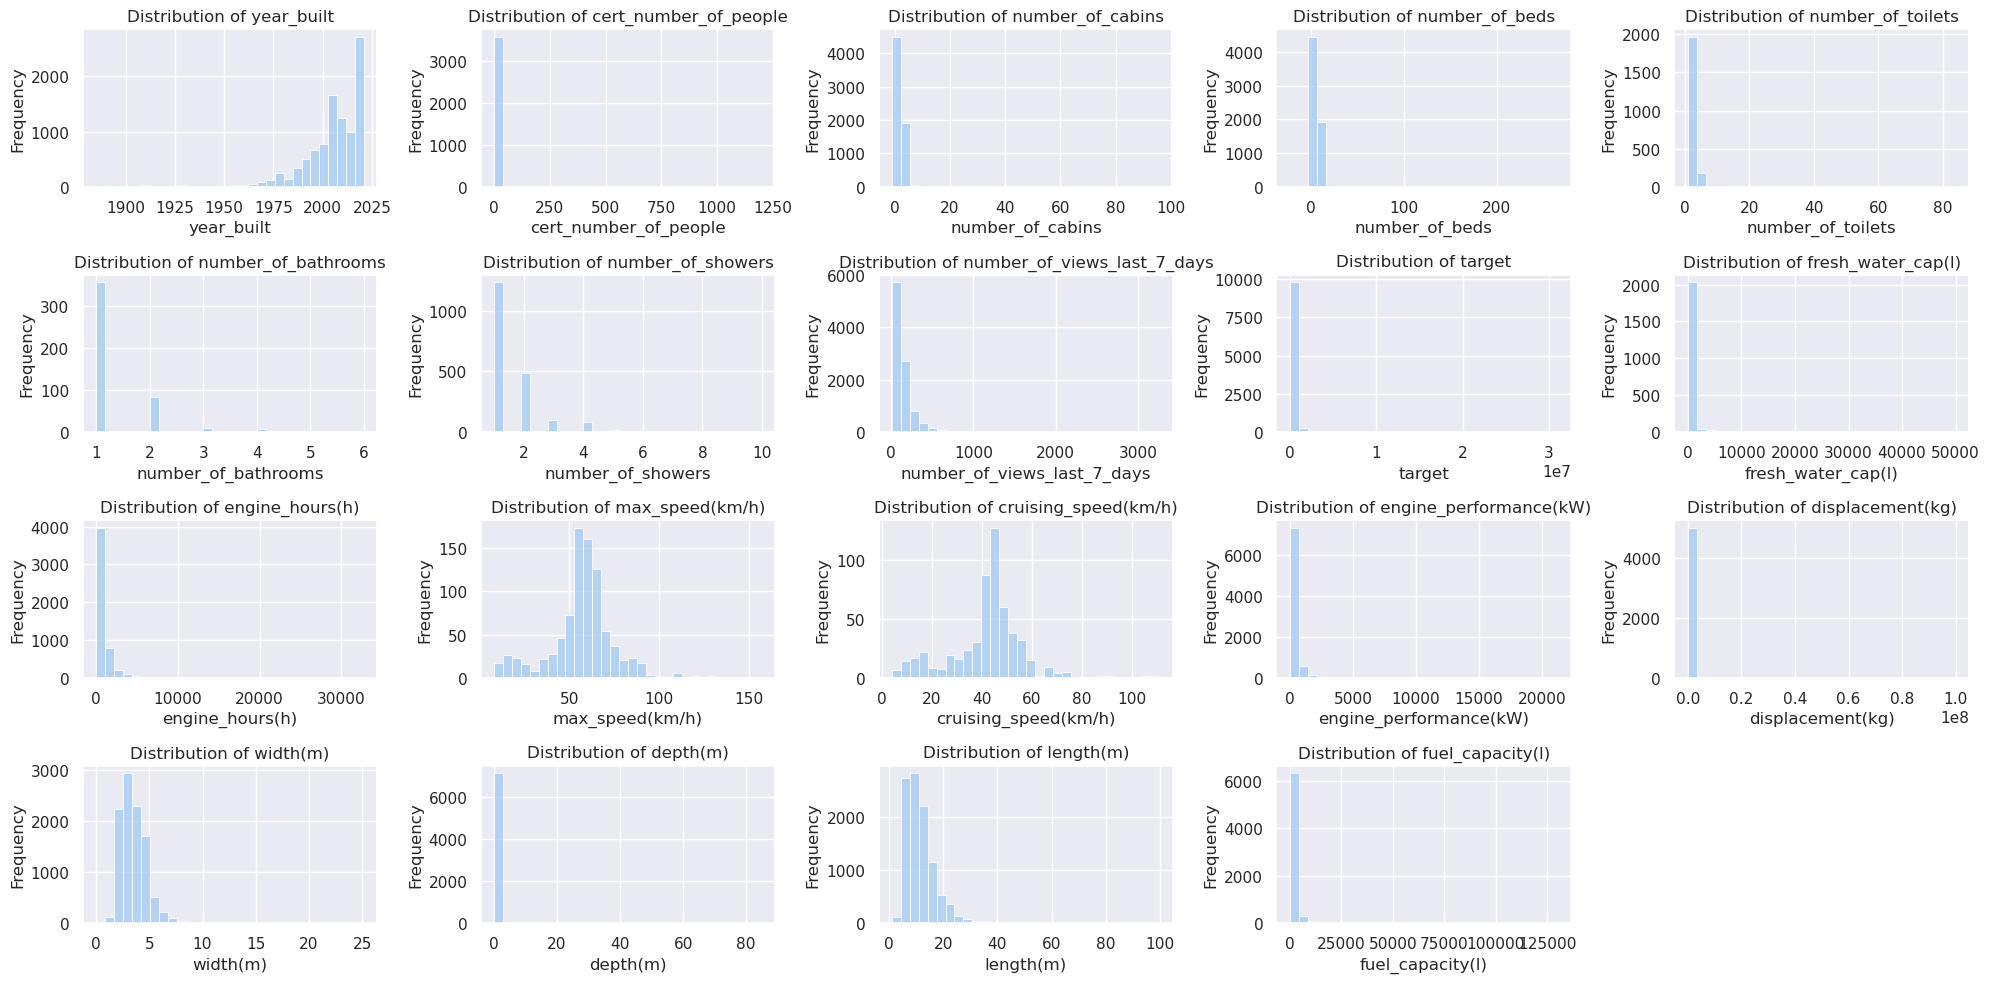

In [49]:
plot_numerical_columns_distribution(df, 4, 5)

In [50]:
df['target'].mean()

301236.01822021557

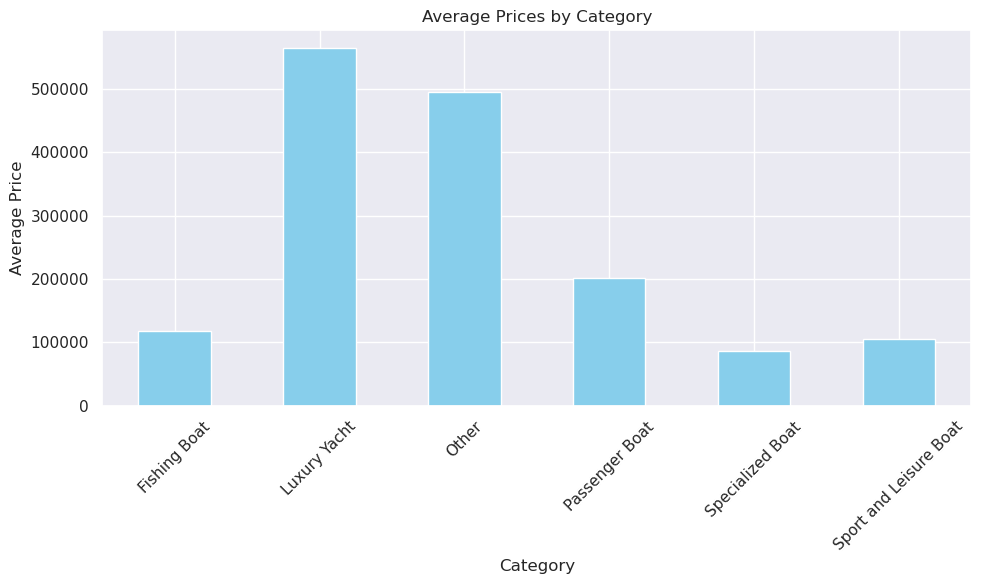

In [51]:
mean_prices = df.groupby('classified_boat_type')['target'].mean()

plt.figure(figsize=(10, 6))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Average Prices by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Normally Luxury Yachts will have the highest price.

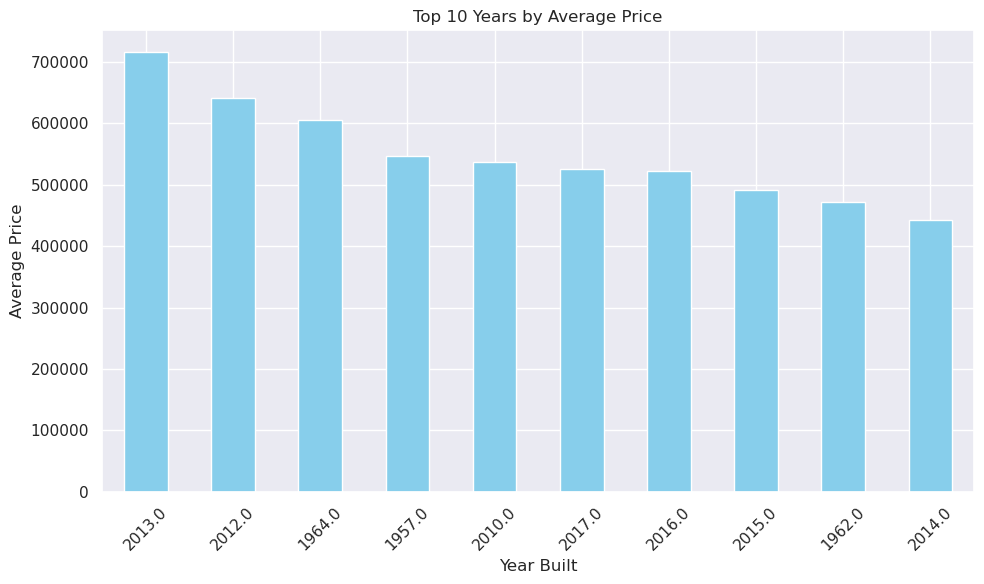

In [52]:
mean_prices = df.groupby('year_built')['target'].mean()

top_10_years = mean_prices.nlargest(10)

plt.figure(figsize=(10, 6))
top_10_years.plot(kind='bar', color='skyblue')
plt.title('Top 10 Years by Average Price')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As expected, there is a relationship between year and price, the newer is the boat, the more pricy it is. Though, there are some edge cases.

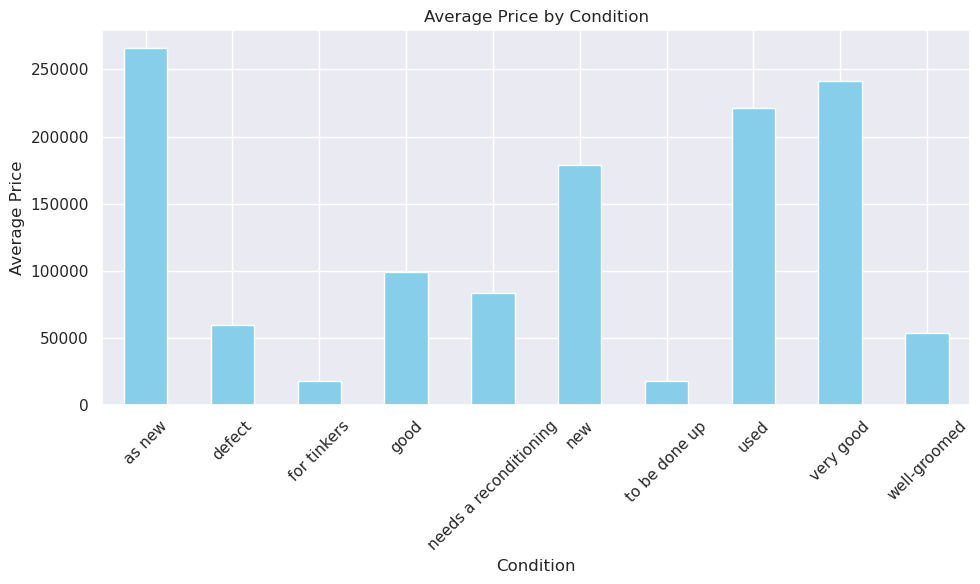

In [53]:
mean_prices = df.groupby('condition')['target'].mean()

plt.figure(figsize=(10, 6))
mean_prices.plot(kind='bar', color='skyblue')
plt.title('Average Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The highest price is had by *as new*, *very good* and not the most obvious *used* class, maybe because their owners are placing high prices because the boats might be modified, as new or just vintage.

### Outliers

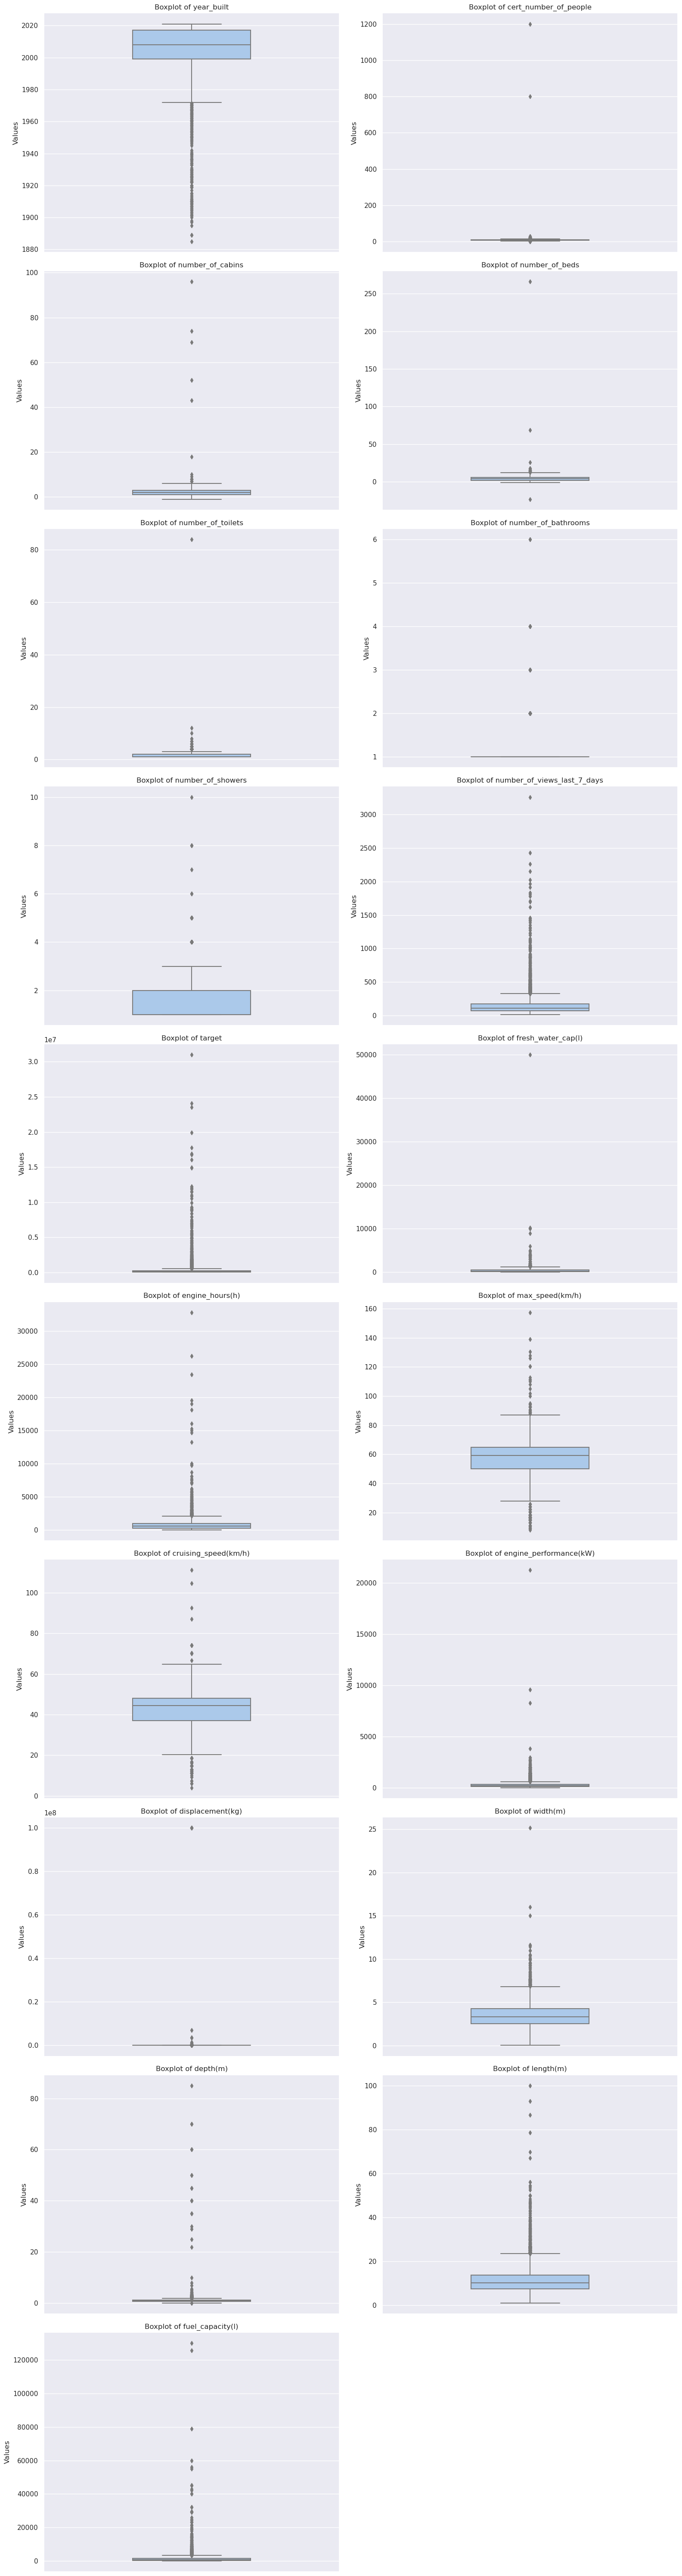

In [54]:
plot_outliers_boxplot(df)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

As seen, practically all columns have outliers.

## NAN Values

<Axes: >

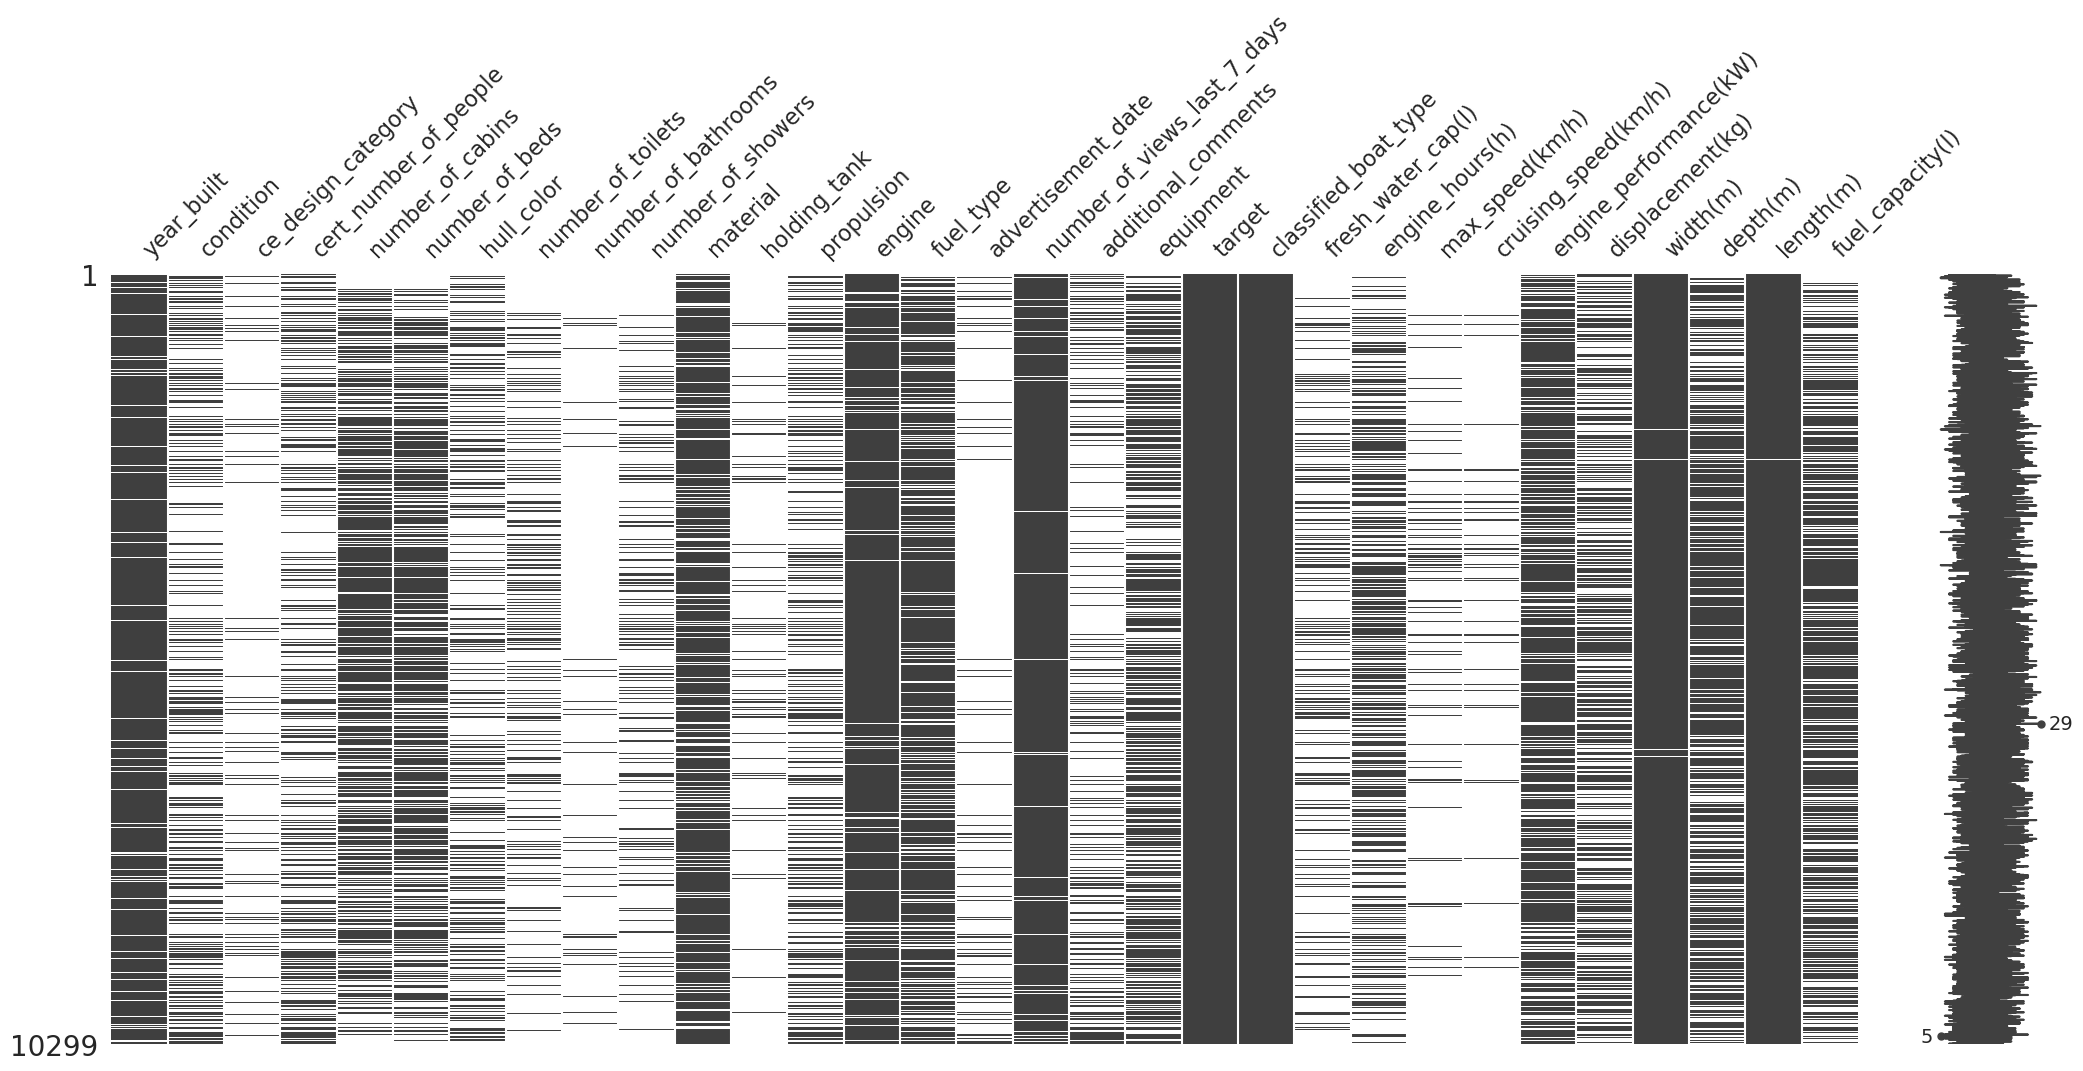

In [55]:
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline
msno.matrix(df)

Let's deal with all NAN value right now so they won't cause any problems in the further analysis.

<Axes: >

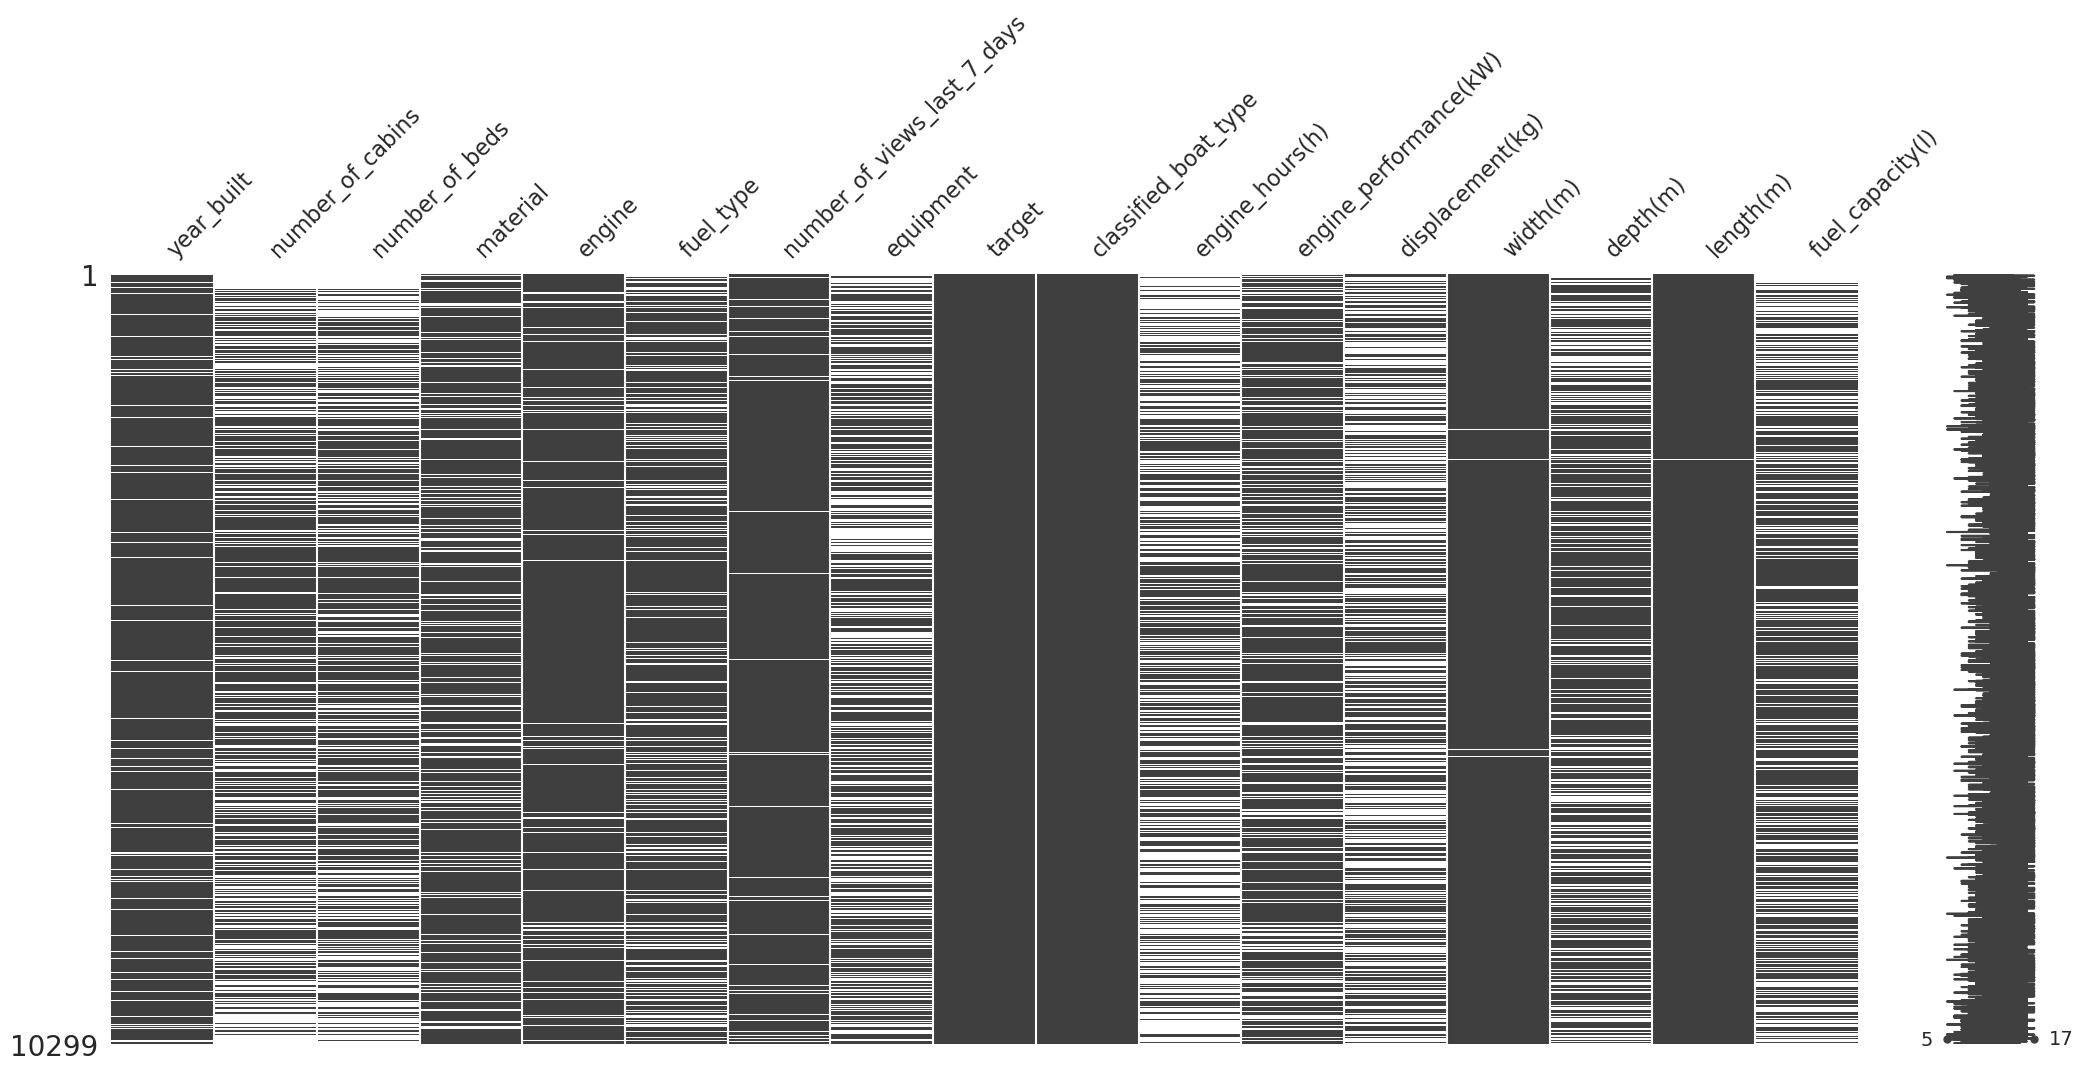

In [56]:
def drop_nan_columns(df, threshold=0.6):
    total_rows = df.shape[0]
    for col in df.columns:
        nan_count = df[col].isnull().sum()
        if nan_count / total_rows > threshold:
            df.drop(col, axis=1, inplace=True)
    return df


df = drop_nan_columns(df)
msno.matrix(df)

Now, it will be easier to deal with them. I decided on deleting the columns with more than 60% nan values, because of high percentage of risk and low accuracy due to lack of data.

## Data Preprocessing 

## *Dealing with specific columns*

### Equipment

In [57]:
equipment_list = df['equipment'].str.split(',', expand=True).values.flatten()
unique_classes = set(equipment_list)
print(list(unique_classes))

['Sink', 'Klapbare GerÃ¤tetrager', 'LED Beleuchtung', 'Bilge pump', 'TruhenbÃ¤nke im Heck', '12-Volt Anschluss', 'Battery Charger', 'Trailer mit Strassenzulassung', 'EdelstahlergÃ¤nzungspaket', 'Rumpffarbe Blau', 'Schrank in Seitenkabine', 'HeiÃ\x9fwassersystem', 'Schiebeluken im Salondach', 'BugÃ¶se', 'Suchscheinwerfer', 'Cockpitkissen', 'DTS Vessel Drive', 'PrÃ©-montage moteur Yamaha', 'Flaps', 'Bugstrahl mit Automatischen Feue', 'DAB+ Radio/Bluetooth Streaming I', 'Ankerwinde elektrisch', 'Suchscheinwerfer mit Fernbedienu', 'Self-Steering Gear', 'Bugpolster 3-teilig demontierbar', 'Fahrersitz klapp-/drehbar', 'Grauwassertank', 'Fensterkleid', 'Sol en SeaDek gris rainurÃ© noir', 'LED Rundum Toplichtstab', 'Horn', '2nd fridge cockpit', 'Sondeur', 'Selbstlenzend', '5 (5mm & 4mm)', 'Bilge Pump', 'Landstromkabel', 'Badeplattform Teakimitation brau', 'HecktÃ¼r zur Badeplattform', 'Standheizung Webasto 2 kW', 'radio Blutooth', 'Packageangebot zum Sonderpreis', 'Termopane Doppelverglasung',

In this case, I'll try to deal with the data simply. I'll just count the number of equipment objects and make a new column called **equipment_count**. This is not the best solution, but due to the multitude of classes and differences, there will troubles in grouping them.

In [58]:
df['equipment_count'] = df['equipment'].dropna().apply(lambda x: len(x.split(',')))
df.drop('equipment', axis=1, inplace=True)
df.head()

year_built  number_of_cabins  number_of_beds       material  \
0      2017.0               NaN             NaN            NaN   
1      2020.0               NaN             NaN  Thermoplastic   
2         NaN               NaN             NaN      Aluminium   
3      2020.0               NaN             NaN            NaN   
4      1974.0               NaN             2.0            NaN   

                                engine fuel_type  number_of_views_last_7_days  \
0                                  NaN       NaN                        226.0   
1                                  NaN       NaN                         75.0   
2   (Permission for Lake of Constance)       NaN                        124.0   
3                                  NaN       NaN                         64.0   
4                   VolvoPenta MD 2002       NaN                        131.0   

    target    classified_boat_type  engine_hours(h)  engine_performance(kW)  \
0  3403.74            Luxury Yacht              NaN                     NaN   
1  3490.00  Sport and Leisure Boat              NaN                     NaN   
2  3845.40  Sport and Leisure Boat              NaN                     NaN   
3  3367.00  Sport and Leisure Boat              NaN                     NaN   
4  3010.00            Fishing Boat            500.0               13.238982   

   displacement(kg)  width(m)  depth(m)  length(m)  fuel_capacity(l)  \
0               NaN      1.90       NaN       4.00               NaN   
1             150.0      1.50       NaN       4.00               NaN   
2               NaN      1.42      0.25       3.69               NaN   
3             110.0      1.00       NaN       3.00               NaN   
4            2000.0      2.50      0.75       6.30              50.0   

   equipment_count  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4             12.0

Now we have a float column analogy for the equipment.

### Material

In [59]:
df["material"].value_counts()

material
GRP                    5725
PVC                    1156
Steel                   973
Wood                    243
Aluminium               236
Plastic                  87
Carbon Fiber             32
Thermoplastic            15
Hypalon                   5
Reinforced concrete       1
Rubber                    1
Name: count, dtype: int64

I'll use target encoding for this one in further data processing, since this column is simple to deal with.

### Engine

In [60]:
df["engine"].value_counts()

engine
Volvo Penta                    375
VOLVO                          266
MAN                            250
SUZUKI                         189
VOLVO PENTA                    171
                              ... 
2 x 2800 HP / 2059 kW            1
2 x 1948 HP / 1433 kW            1
2 x MTU 2750HP                   1
MTU DIESEL + ARNESON DRIVES      1
Mariner 40 hp                    1
Name: count, Length: 4725, dtype: int64

It's 4725 different classes.

In [61]:
df["engine"].value_counts().head(30)

engine
Volvo Penta                                      375
VOLVO                                            266
MAN                                              250
SUZUKI                                           189
VOLVO PENTA                                      171
Mercury                                          134
YAMAHA                                           120
MERCURY                                          115
Mercruiser                                       115
 (Permission for Lake of Constance)              106
MTU                                              105
Caterpillar                                      100
Suzuki                                            89
Volvo                                             89
Yamaha                                            85
Yanmar                                            85
MERCRUISER                                        77
Cummins                                           57
CUMMINS                                

Since we have already two different columns related to engine which are **engine_performance(kW)** and **engine_hours(h)**, plus **fuel_capacity** and **fuel_type**, a great solution will be to remove that column, because we have already great numerical columns with analogical data.

In [62]:
df.drop('engine', axis=1, inplace=True)
df.head()

year_built  number_of_cabins  number_of_beds       material fuel_type  \
0      2017.0               NaN             NaN            NaN       NaN   
1      2020.0               NaN             NaN  Thermoplastic       NaN   
2         NaN               NaN             NaN      Aluminium       NaN   
3      2020.0               NaN             NaN            NaN       NaN   
4      1974.0               NaN             2.0            NaN       NaN   

   number_of_views_last_7_days   target    classified_boat_type  \
0                        226.0  3403.74            Luxury Yacht   
1                         75.0  3490.00  Sport and Leisure Boat   
2                        124.0  3845.40  Sport and Leisure Boat   
3                         64.0  3367.00  Sport and Leisure Boat   
4                        131.0  3010.00            Fishing Boat   

   engine_hours(h)  engine_performance(kW)  displacement(kg)  width(m)  \
0              NaN                     NaN               NaN      1.90   
1              NaN                     NaN             150.0      1.50   
2              NaN                     NaN               NaN      1.42   
3              NaN                     NaN             110.0      1.00   
4            500.0               13.238982            2000.0      2.50   

   depth(m)  length(m)  fuel_capacity(l)  equipment_count  
0       NaN       4.00               NaN              NaN  
1       NaN       4.00               NaN              NaN  
2      0.25       3.69               NaN              NaN  
3       NaN       3.00               NaN              NaN  
4      0.75       6.30              50.0             12.0

### Fuel Type

In [63]:
df["fuel_type"].value_counts()

fuel_type
Diesel      4734
Unleaded    3177
Electric      54
Gas           16
Hybrid         2
Propane        1
Name: count, dtype: int64

## *Encoding and Labelling*

In [64]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder

encoder = TargetEncoder(handle_missing = 'return_nan')
df['material'] = encoder.fit_transform(df['material'], df['target'])

classified_boat_type_encoded_df = pd.get_dummies(df['classified_boat_type'], prefix='boat_type').astype(int)
df = pd.concat([df, classified_boat_type_encoded_df], axis=1)

fuel_type_encoded_df = pd.get_dummies(df['fuel_type'], prefix='fuel_type', dummy_na=True).astype(int)
df = pd.concat([df, fuel_type_encoded_df], axis=1)

df.drop(['material', 'classified_boat_type', 'fuel_type'], axis=1, inplace=True)

df.head()

year_built  number_of_cabins  number_of_beds  number_of_views_last_7_days  \
0      2017.0               NaN             NaN                        226.0   
1      2020.0               NaN             NaN                         75.0   
2         NaN               NaN             NaN                        124.0   
3      2020.0               NaN             NaN                         64.0   
4      1974.0               NaN             2.0                        131.0   

    target  engine_hours(h)  engine_performance(kW)  displacement(kg)  \
0  3403.74              NaN                     NaN               NaN   
1  3490.00              NaN                     NaN             150.0   
2  3845.40              NaN                     NaN               NaN   
3  3367.00              NaN                     NaN             110.0   
4  3010.00            500.0               13.238982            2000.0   

   width(m)  depth(m)  length(m)  fuel_capacity(l)  equipment_count  \
0      1.90       NaN       4.00               NaN              NaN   
1      1.50       NaN       4.00               NaN              NaN   
2      1.42      0.25       3.69               NaN              NaN   
3      1.00       NaN       3.00               NaN              NaN   
4      2.50      0.75       6.30              50.0             12.0   

   boat_type_Fishing Boat  boat_type_Luxury Yacht  boat_type_Other  \
0                       0                       1                0   
1                       0                       0                0   
2                       0                       0                0   
3                       0                       0                0   
4                       1                       0                0   

   boat_type_Passenger Boat  boat_type_Specialized Boat  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   boat_type_Sport and Leisure Boat  fuel_type_Diesel  fuel_type_Electric  \
0                                 0                 0                   0   
1                                 1                 0                   0   
2                                 1                 0                   0   
3                                 1                 0                   0   
4                                 0                 0                   0   

   fuel_type_Gas  fuel_type_Hybrid  fuel_type_Propane  fuel_type_Unleaded  \
0              0                 0                  0                   0   
1              0                 0                  0                   0   
2              0                 0                  0                   0   
3              0                 0                  0                   0   
4              0                 0                  0                   0   

   fuel_type_nan  
0              1  
1              1  
2              1  
3              1  
4              1

In [65]:
old_df = df

## *Missing Values Imputation*

In [66]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

<Axes: >

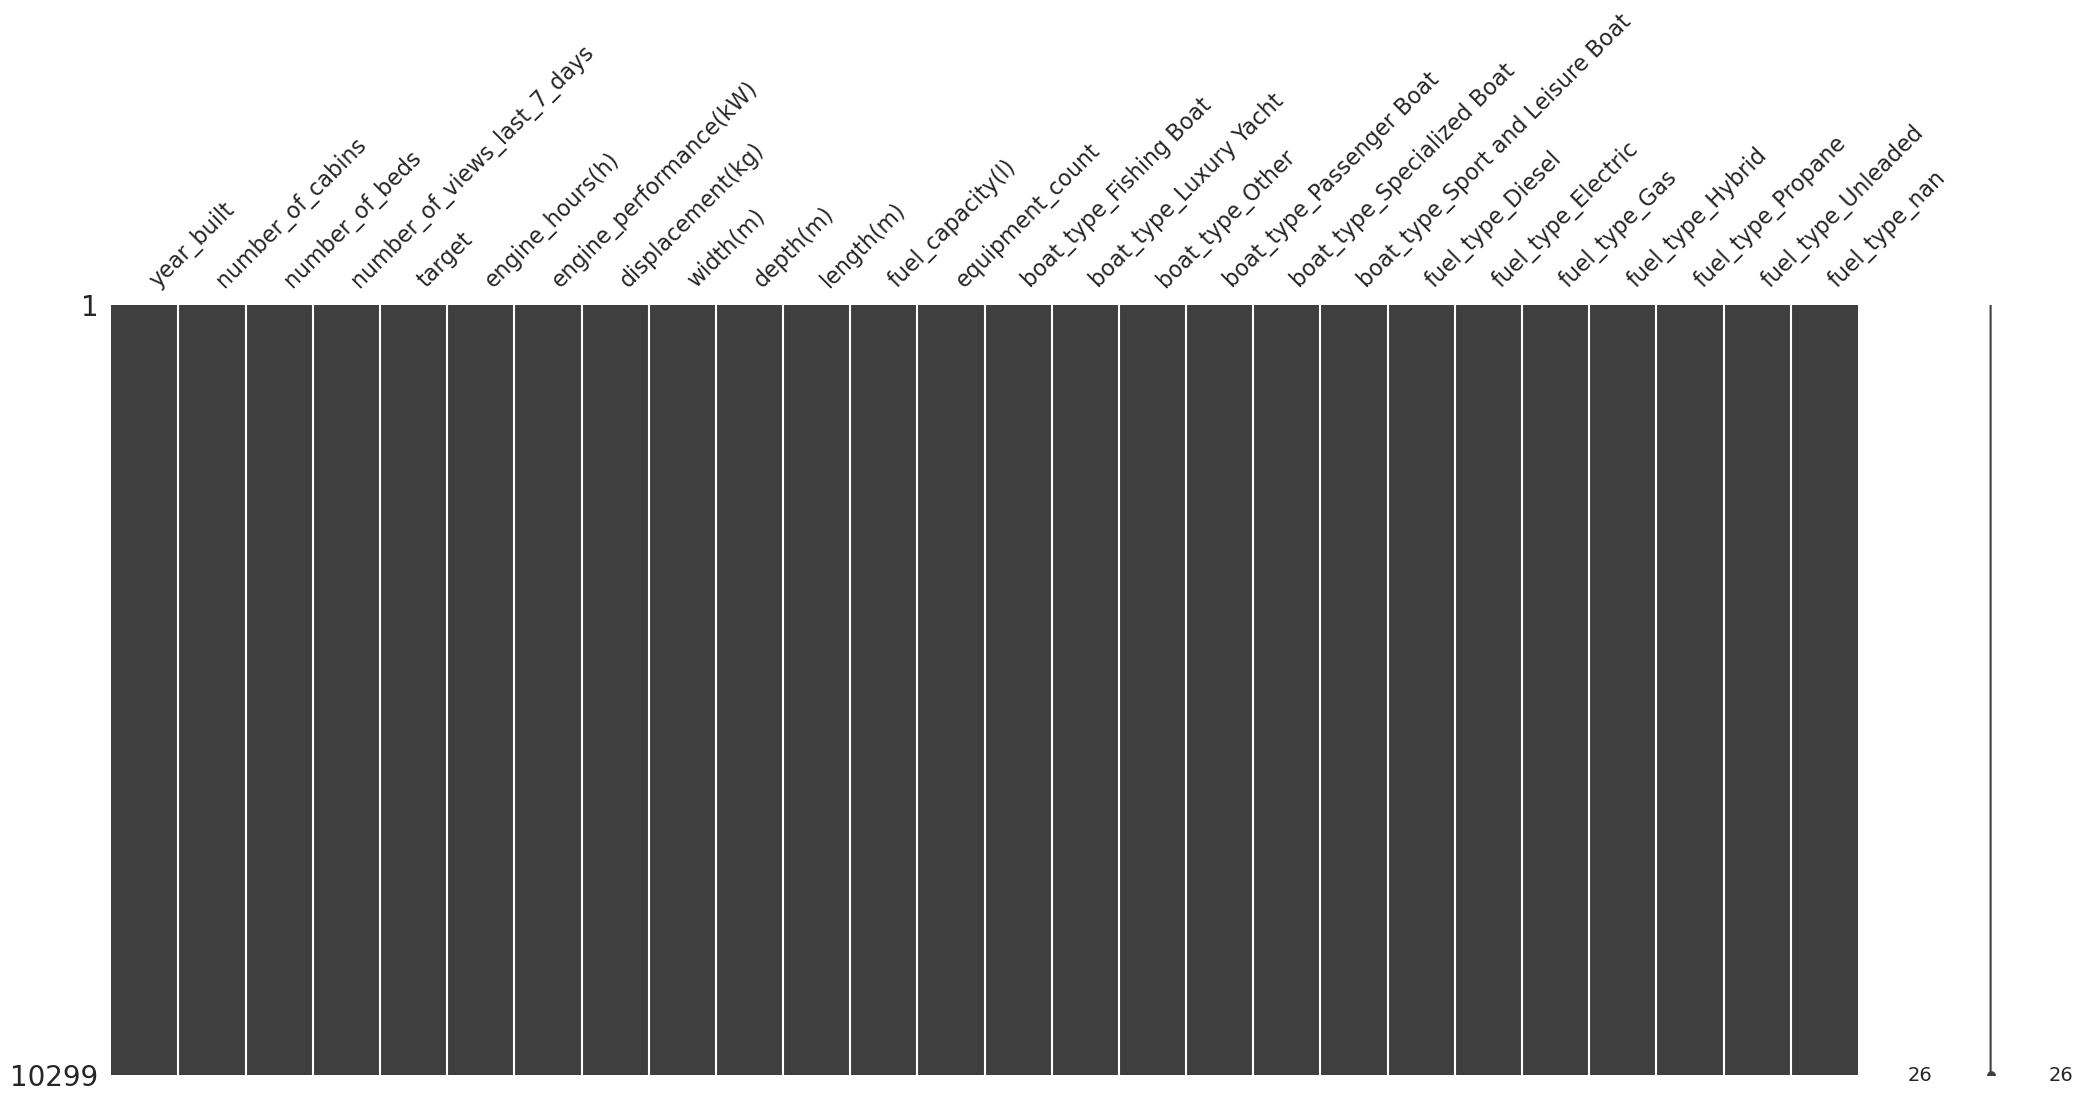

In [67]:
msno.matrix(df)

## *Correlations*

<Axes: >

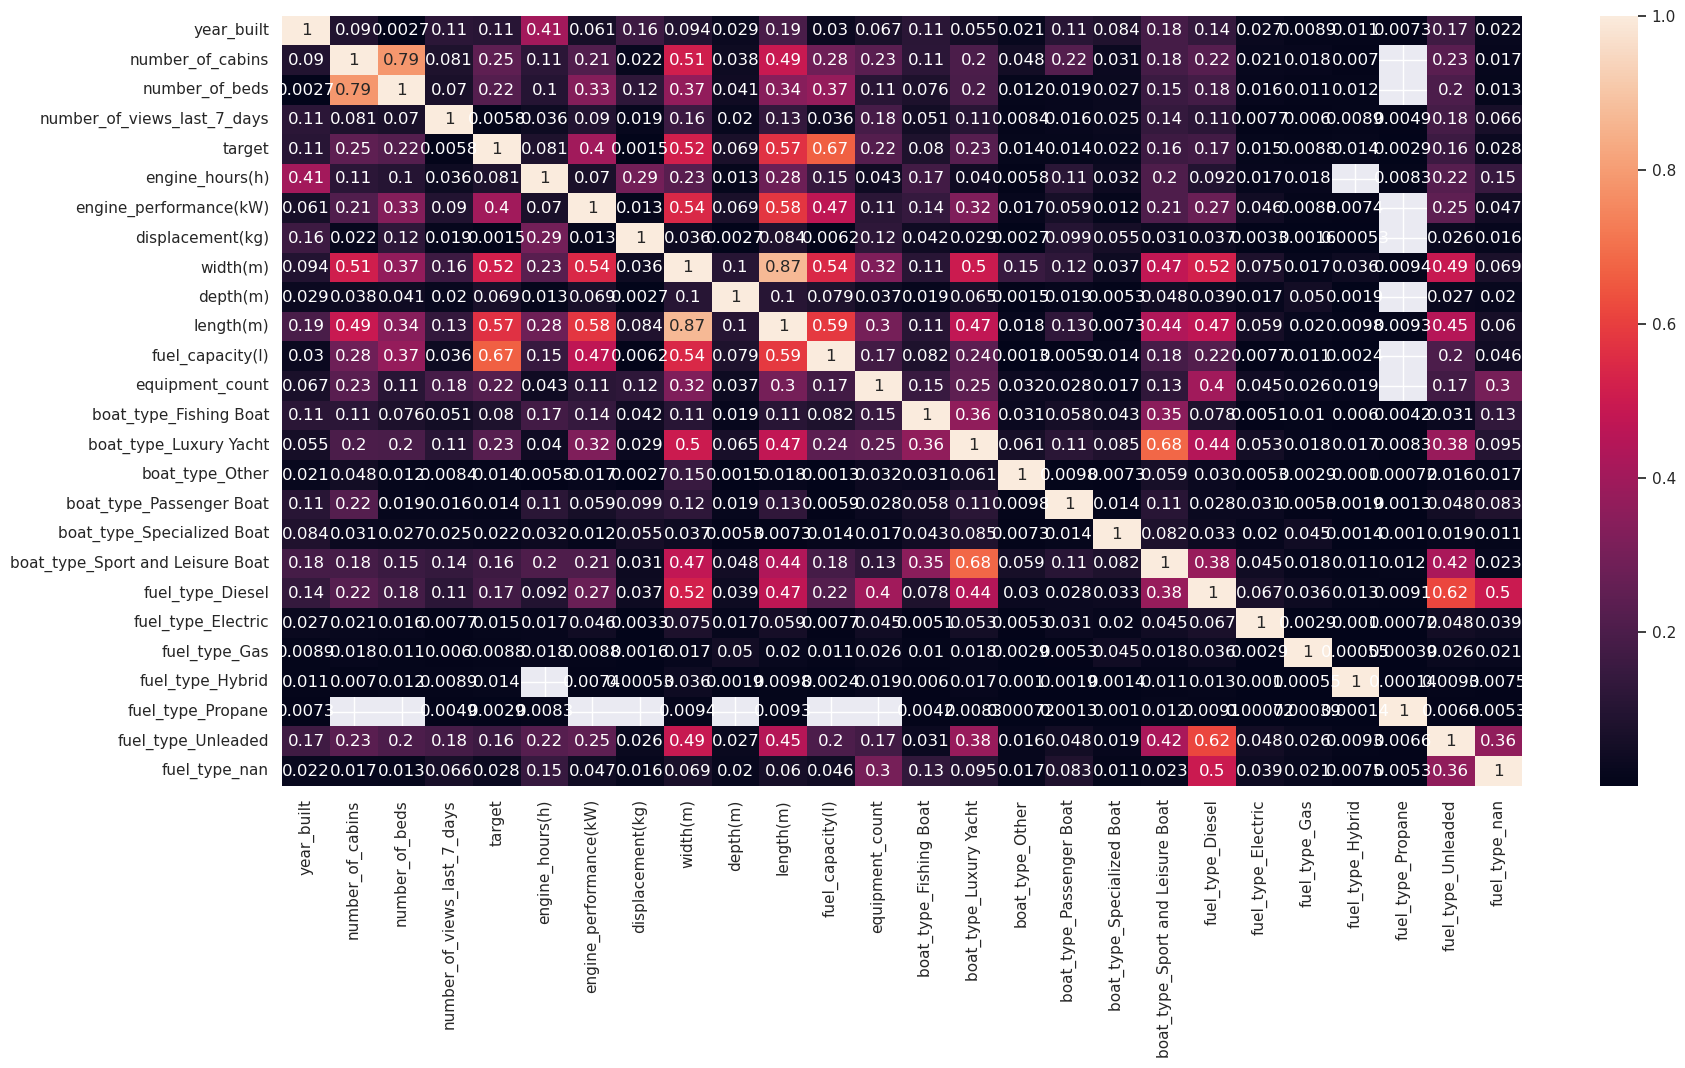

In [68]:
plt.figure(figsize=(20, 10))
correlation_matrix = old_df.corr().abs()
sns.heatmap(correlation_matrix, annot=True)

In [69]:
sorted_correlations = correlation_matrix['target'].sort_values(ascending=False)
sorted_correlations

target                              1.000000
fuel_capacity(l)                    0.667918
length(m)                           0.567777
width(m)                            0.518307
engine_performance(kW)              0.401183
number_of_cabins                    0.245861
boat_type_Luxury Yacht              0.226061
equipment_count                     0.221529
number_of_beds                      0.219989
fuel_type_Diesel                    0.172415
boat_type_Sport and Leisure Boat    0.162253
fuel_type_Unleaded                  0.157612
year_built                          0.105851
engine_hours(h)                     0.080870
boat_type_Fishing Boat              0.080063
depth(m)                            0.068852
fuel_type_nan                       0.028379
boat_type_Specialized Boat          0.022181
fuel_type_Electric                  0.015224
boat_type_Other                     0.014375
fuel_type_Hybrid                    0.013692
boat_type_Passenger Boat            0.013607
fuel_type_

<Axes: >

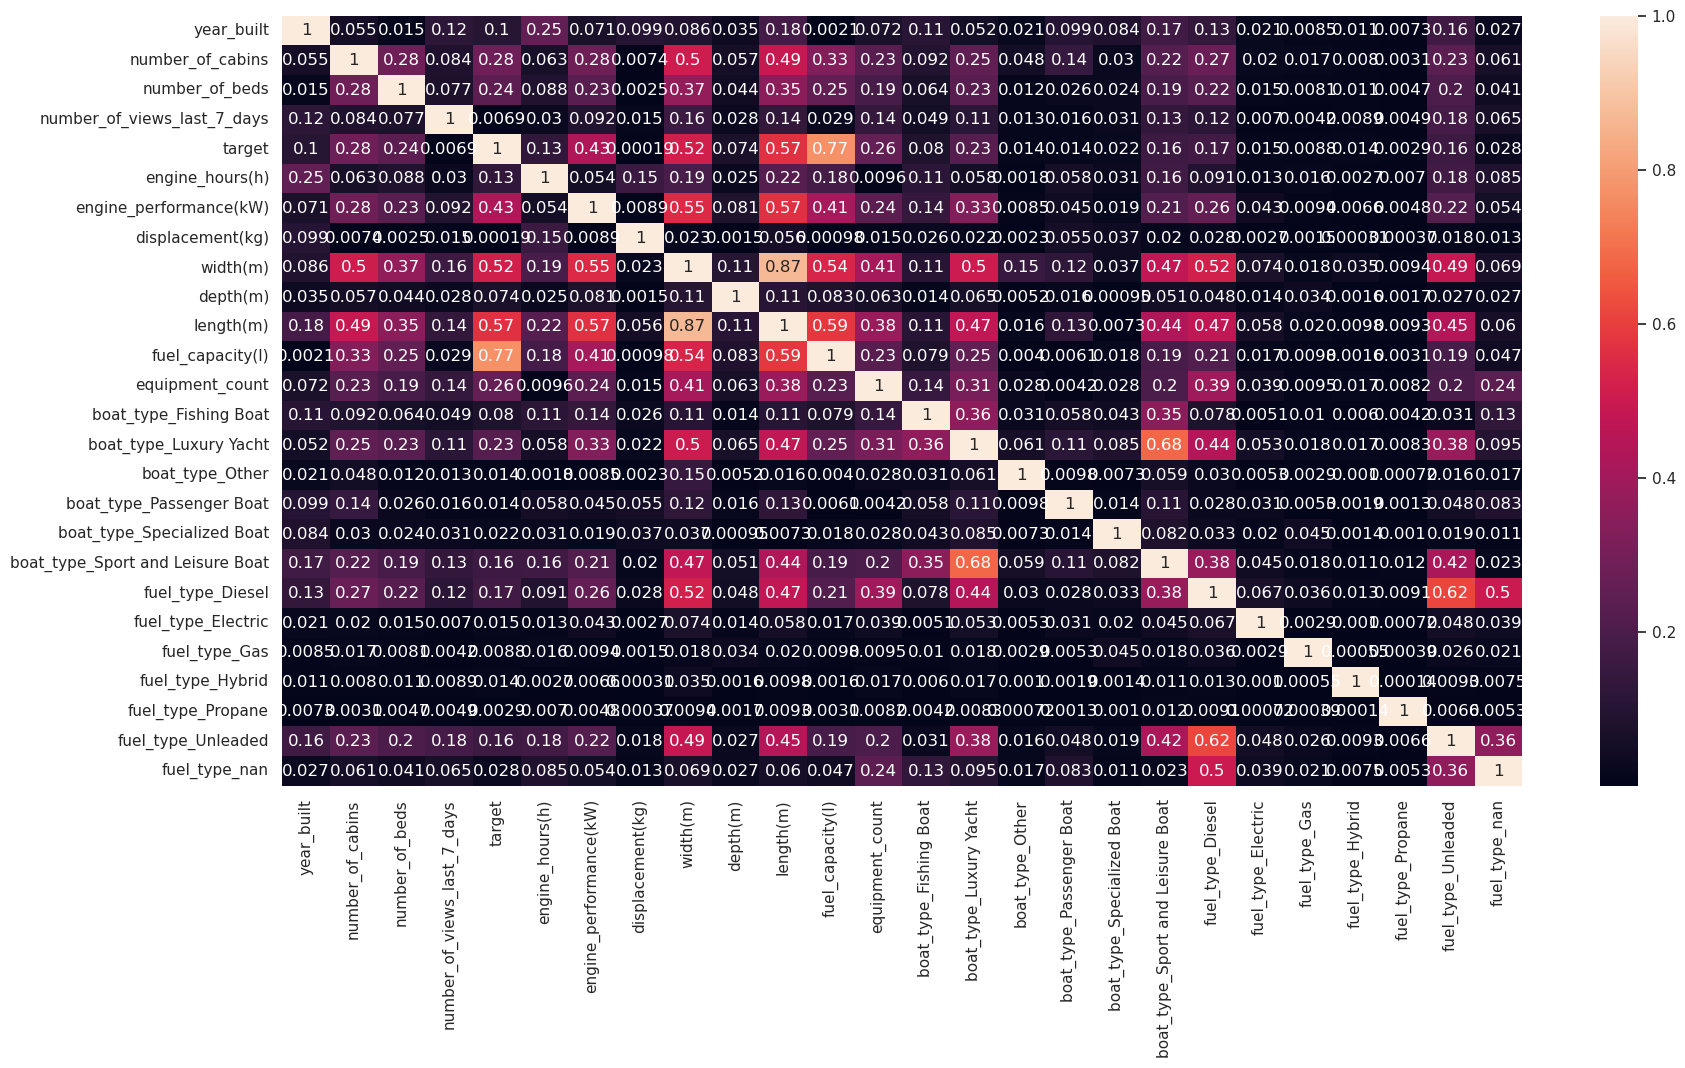

In [70]:
plt.figure(figsize=(20, 10))
correlation_matrix = df.corr().abs()
sns.heatmap(correlation_matrix, annot=True)

In [71]:
sorted_correlations = correlation_matrix['target'].sort_values(ascending=False)
sorted_correlations

target                              1.000000
fuel_capacity(l)                    0.772748
length(m)                           0.567786
width(m)                            0.519388
engine_performance(kW)              0.433667
number_of_cabins                    0.281521
equipment_count                     0.261172
number_of_beds                      0.239695
boat_type_Luxury Yacht              0.226061
fuel_type_Diesel                    0.172415
boat_type_Sport and Leisure Boat    0.162253
fuel_type_Unleaded                  0.157612
engine_hours(h)                     0.131396
year_built                          0.104760
boat_type_Fishing Boat              0.080063
depth(m)                            0.073556
fuel_type_nan                       0.028379
boat_type_Specialized Boat          0.022181
fuel_type_Electric                  0.015224
boat_type_Other                     0.014375
fuel_type_Hybrid                    0.013692
boat_type_Passenger Boat            0.013607
fuel_type_

After imputing null values, some columns have increased their correlation.

## *Outliers* 

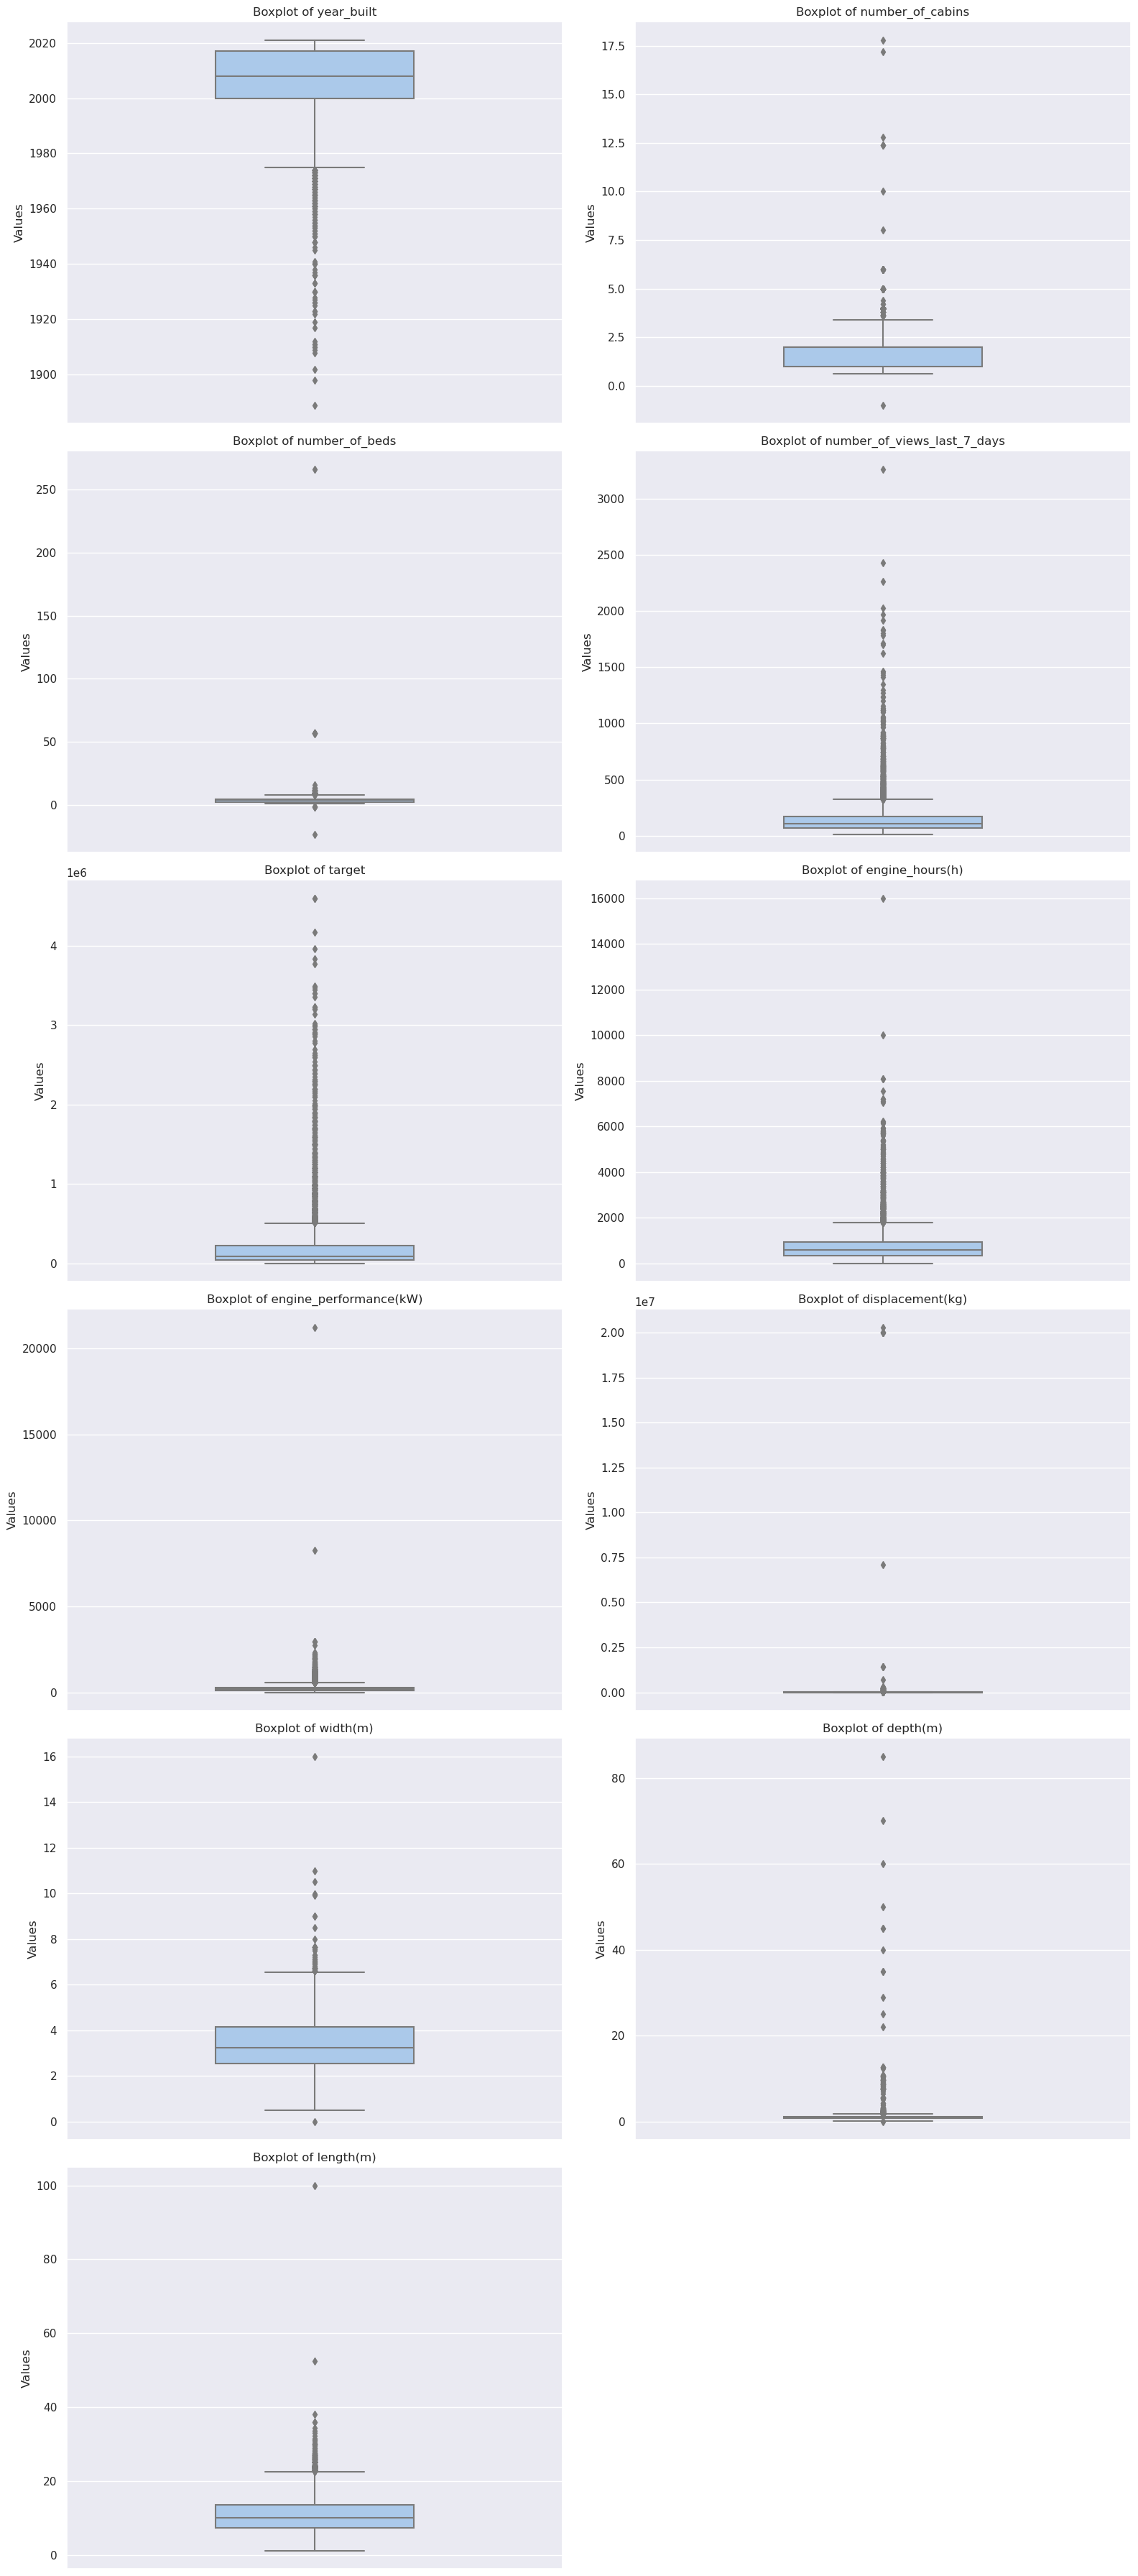

In [72]:
def remove_outliers(data, contamination=0.1, random_state=None):
    model = IsolationForest(contamination=contamination, random_state=random_state)
    model.fit(data)
    outliers = model.predict(data)
    filtered_data = data[outliers != -1]
    return filtered_data

df = remove_outliers(df)
numerical_columns = ["year_built","number_of_cabins","number_of_beds","number_of_views_last_7_days","target","engine_hours(h)","engine_performance(kW)","displacement(kg)","width(m)","depth(m)","length(m)"]
plot_outliers_boxplot(df[numerical_columns])

After that we were able to remove some outliers, though some of them remain.

In [95]:
from sklearn.ensemble import IsolationForest

def calculate_outlier_percentage(data):
    isolation_forest = IsolationForest()
    isolation_forest.fit(data)
    outliers = isolation_forest.predict(data)
    num_outliers = len(data[outliers == -1])
    percentage_outliers = (num_outliers / len(data)) * 100
    
    return percentage_outliers

calculate_outlier_percentage(df[numerical_columns])

7.045408267155366

## Data Transformation

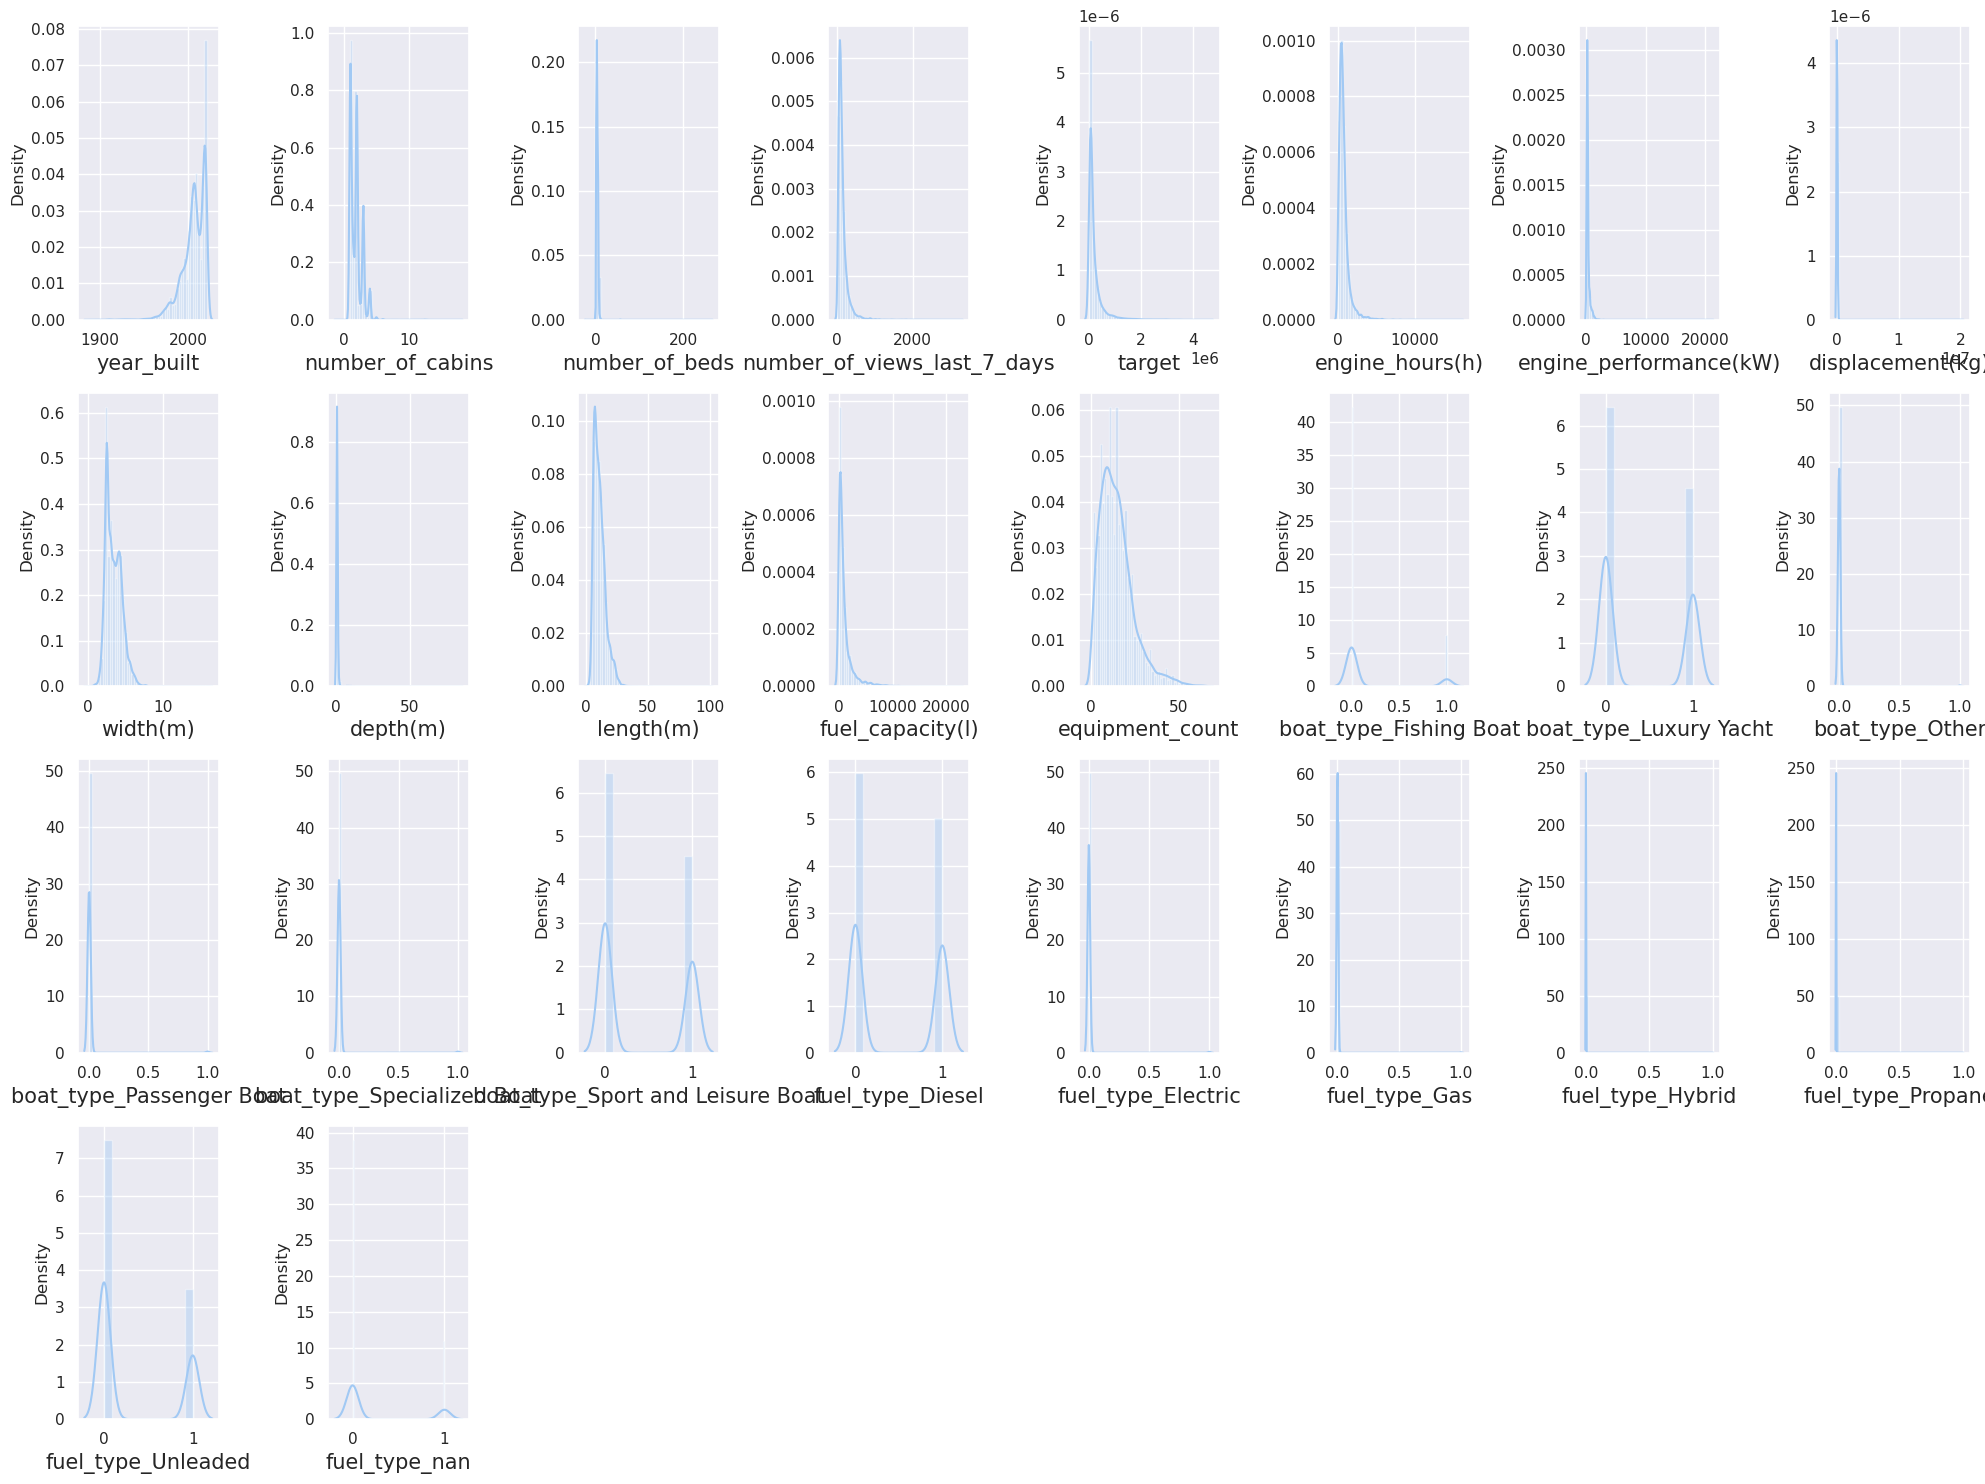

In [74]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 32:
        ax = plt.subplot(4, 8, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

We might need to apply normalization or scaling. Since normalization will give us negative values, leading onto more algorithms and steps, testing more scaling techniques and apply only scaling, would be a better solution.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
y = df['target']
X = df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - R2 score before scaling: {r2_gb}")

scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

for scaler_name, scaler in scalers.items():
    X_train_scaled, X_test_scaled = X_train.copy(), X_test.copy()
    
    numerical_columns = X_train.columns
    
    X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
    X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

    gb_model = GradientBoostingRegressor()
    gb_model.fit(X_train_scaled, y_train)
    y_pred_gb = gb_model.predict(X_test_scaled)
    r2_gb = r2_score(y_test, y_pred_gb)
    print(f"Gradient Boosting - R2 score using {scaler_name}: {r2_gb}")

Gradient Boosting - R2 score before scaling: 0.9115654535766314
Gradient Boosting - R2 score using MinMaxScaler: 0.9120951113485195
Gradient Boosting - R2 score using StandardScaler: 0.9116259354328403


Let's choose MinMaxScaler since it gives the most stable results.

In [76]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)

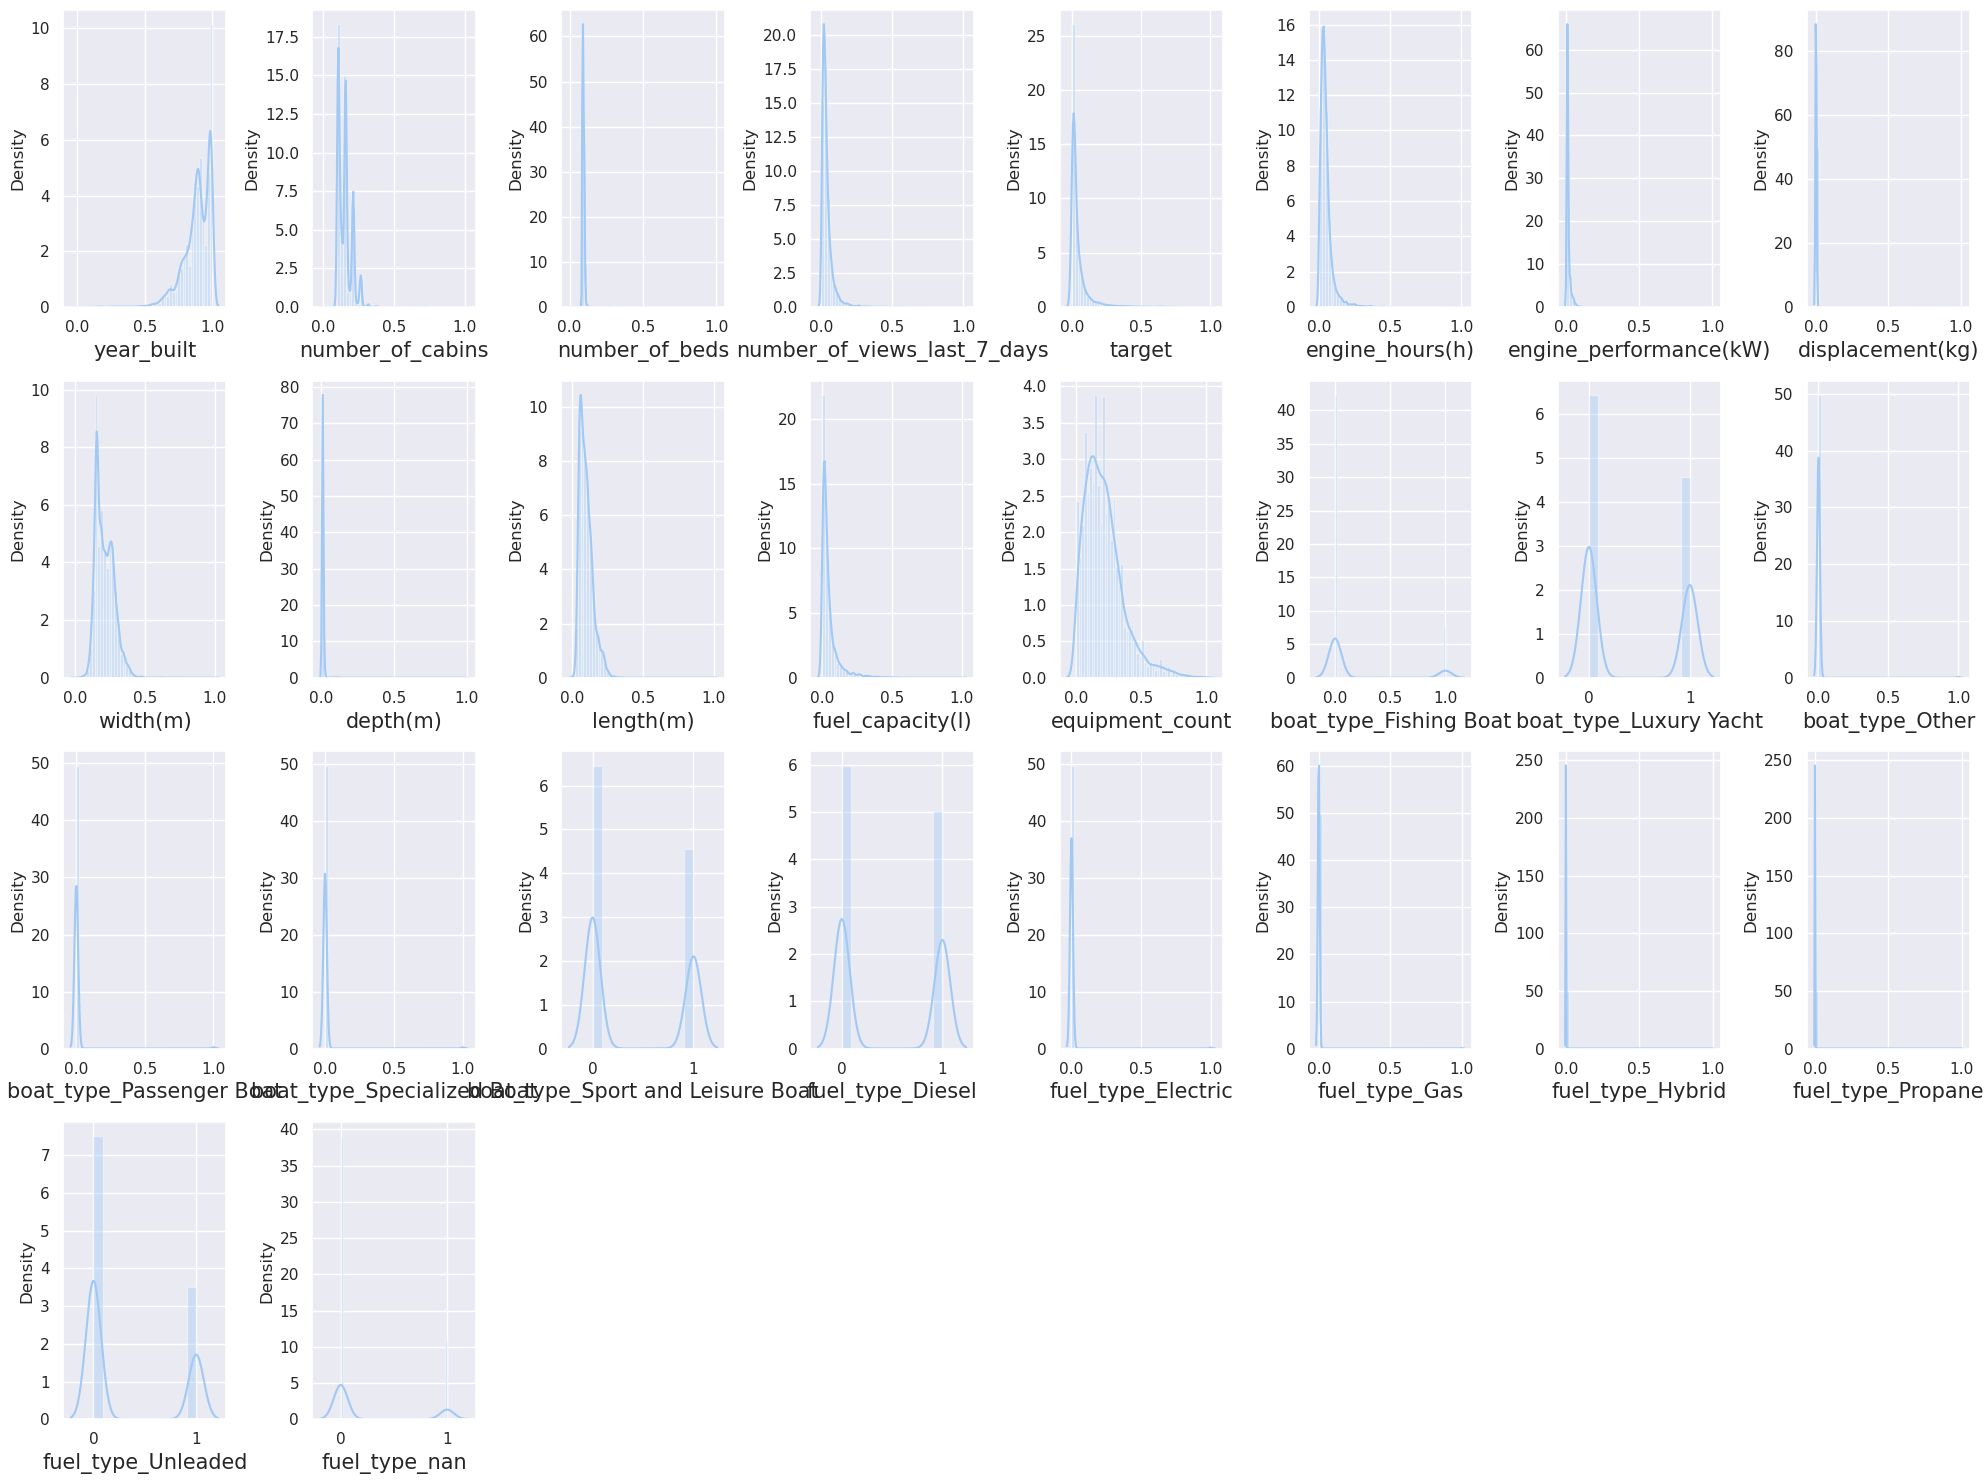

In [77]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 32:
        ax = plt.subplot(4, 8, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

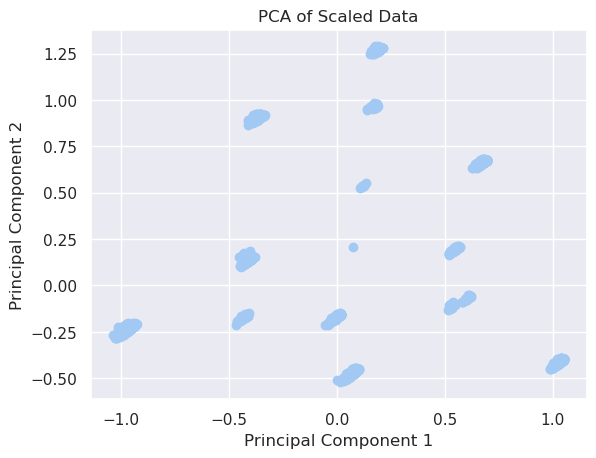

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X = df.drop('target', axis=1)  
y = df['target']

X_pca = pca.fit_transform(X)

X_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

plt.scatter(X_pca['Principal Component 1'], X_pca['Principal Component 2'])
plt.title('PCA of Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [79]:
gb_model = GradientBoostingRegressor()
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
r2_gb

0.44943287634400275

Since results are quite bad, we will not use it.

## Feature Selection

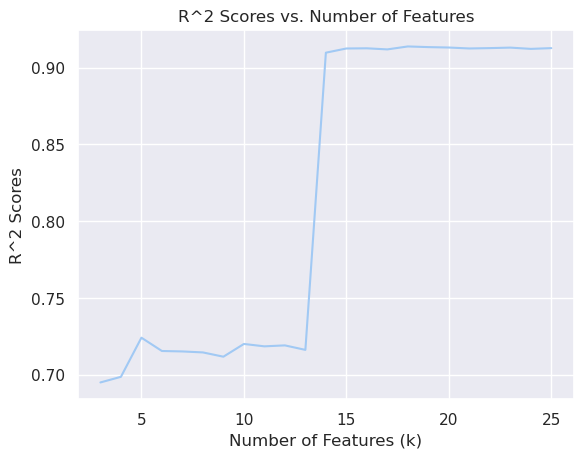

In [80]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def calculate_r2_kbest(X, y, regressor):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    r2_scores = []
    k_values = range(3, len(X.columns) + 1)

    for k in k_values:
        selected_features = SelectKBest(score_func=f_classif, k=k).fit(X_train, y_train)
        X_train_selected = selected_features.transform(X_train)
        X_test_selected = selected_features.transform(X_test)
        regressor.fit(X_train_selected, y_train)

        y_pred = regressor.predict(X_test_selected)
        r2 = r2_score(y_test, y_pred)

        r2_scores.append(r2)
    return k_values, r2_scores

X = df.drop('target', axis=1)
y = df['target']
regressor = GradientBoostingRegressor()

k_values, r2_scores = calculate_r2_kbest(X, y, regressor)
plt.plot(k_values, r2_scores)
plt.xlabel('Number of Features (k)')
plt.ylabel('R^2 Scores')
plt.title('R^2 Scores vs. Number of Features')
plt.show()

Best number of features is above 15.


## Model Selection

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


regression_models = {
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Ridge Regression": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Support Vector Regression": SVR()
}

df = df.sample(frac=1, random_state=4).reset_index(drop=True)

X = df.drop('target', axis=1)  
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_comparison_table, best_regressor = create_regression_table(regression_models, X_train, y_train)

regression_comparison_table

Estimator  Mean Squared Error  Mean Absolute Error  \
0  Gradient Boosting Regressor            0.000590             0.011366   
1             Ridge Regression            0.002312             0.025060   
2      Random Forest Regressor            0.000579             0.010219   
3            XGBoost Regressor            0.000568             0.010434   
4    Support Vector Regression            0.004358             0.058454   

   R2 Score  
0  0.908040  
1  0.639808  
2  0.909726  
3  0.911536  
4  0.320986

In [82]:
best_regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Since best regressor is Random Forest Regressor, we will use it for Model Interpretation and Hyperparameter Tuning

## Model Interpretation

PermutationExplainer explainer: 1966it [01:43, 17.30it/s]                               


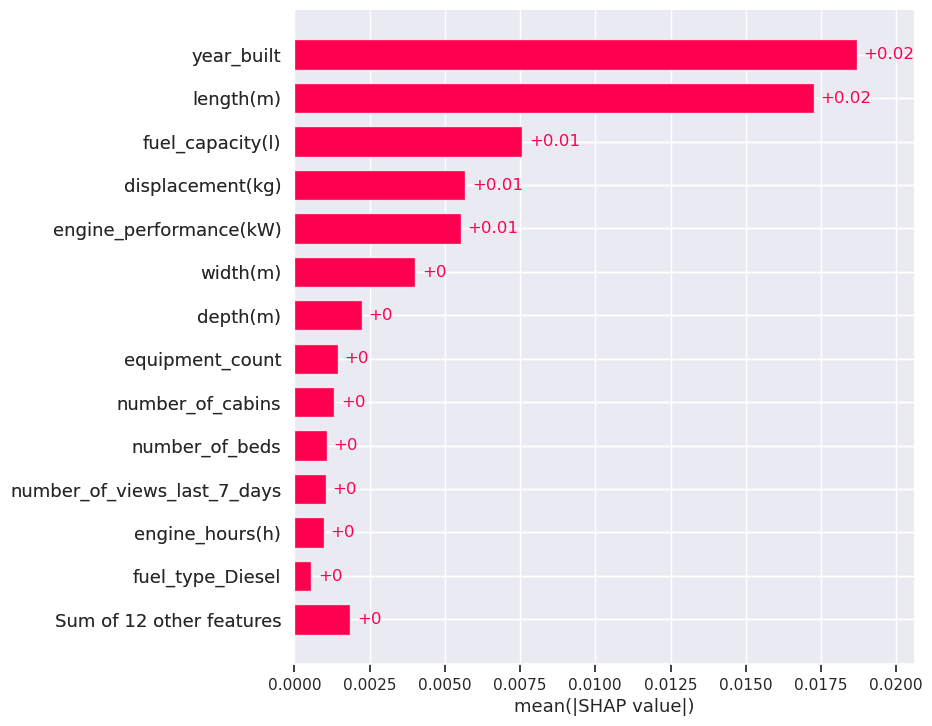

In [83]:
import shap

shap.initjs()

explainer = shap.Explainer(best_regressor.predict, X_train,
feature_names = list(df.columns)[:-1])

shap_values = explainer(X_test)

shap.plots.bar(shap_values, max_display=14)

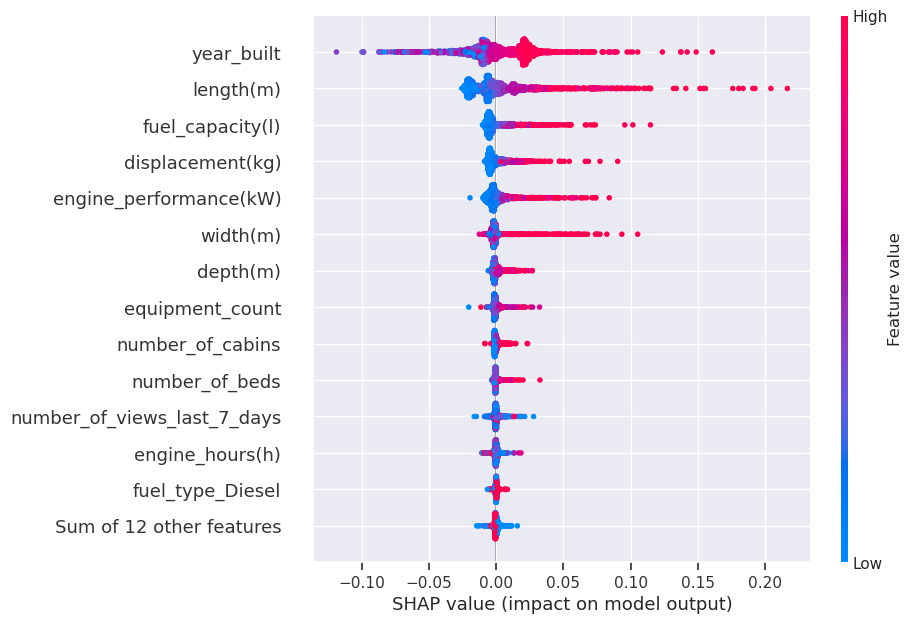

In [84]:
shap.plots.beeswarm(shap_values, max_display=14)

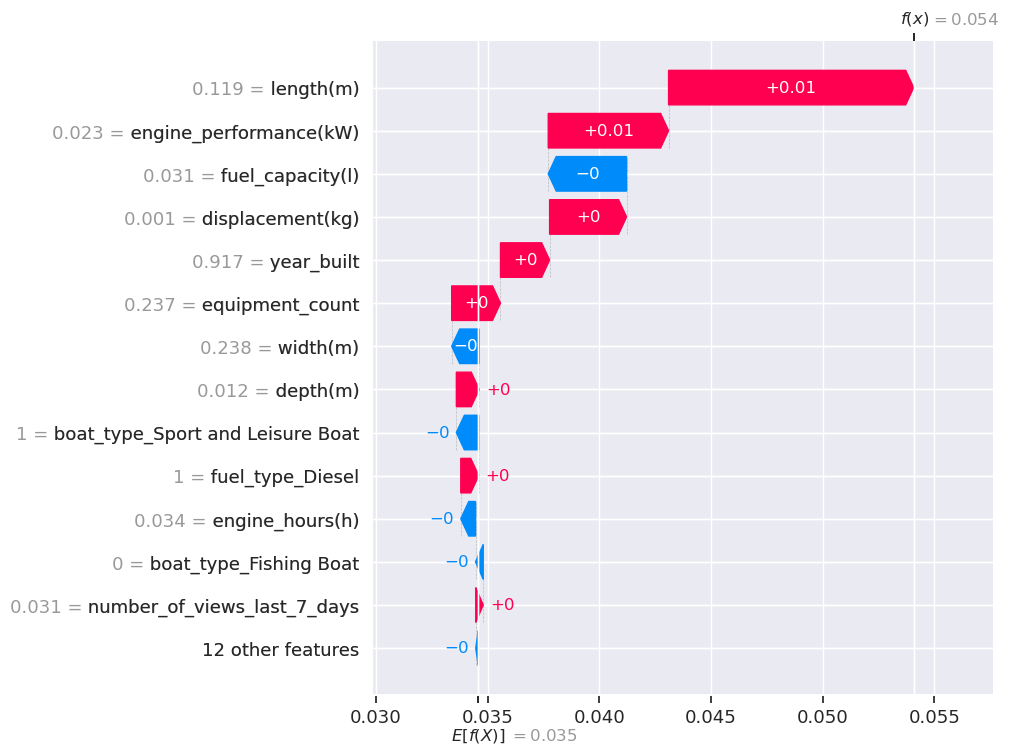

In [85]:
shap.plots.waterfall(shap_values[0], max_display=14)

After interpretation of the model we can easily see that the most impactful features are *year_built*, *length* and *equipment_count*.
It can be explained easily by saying that newer the car, better the price, though there are some edge cases. Same about the length and equipment.

## Hyperparameter Tuning 

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(10, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(range(5, 50)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

rf = RandomForestRegressor()

def random_search(estimator, param_distributions, n_iter=40, cv=5):
    random_search = RandomizedSearchCV(estimator, param_distributions, n_iter=n_iter, scoring='r2', cv=cv, verbose=1)
    random_search.fit(X_train, y_train)
    print("Best parameters found: ", random_search.best_params_)
    print("Best score found: ", random_search.best_score_)
    return random_search.best_estimator_ , random_search.best_params_

best_estimator,_ = random_search(rf, param_dist)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 31, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 639}
Best score found:  0.8911285021332477


## Conclusions

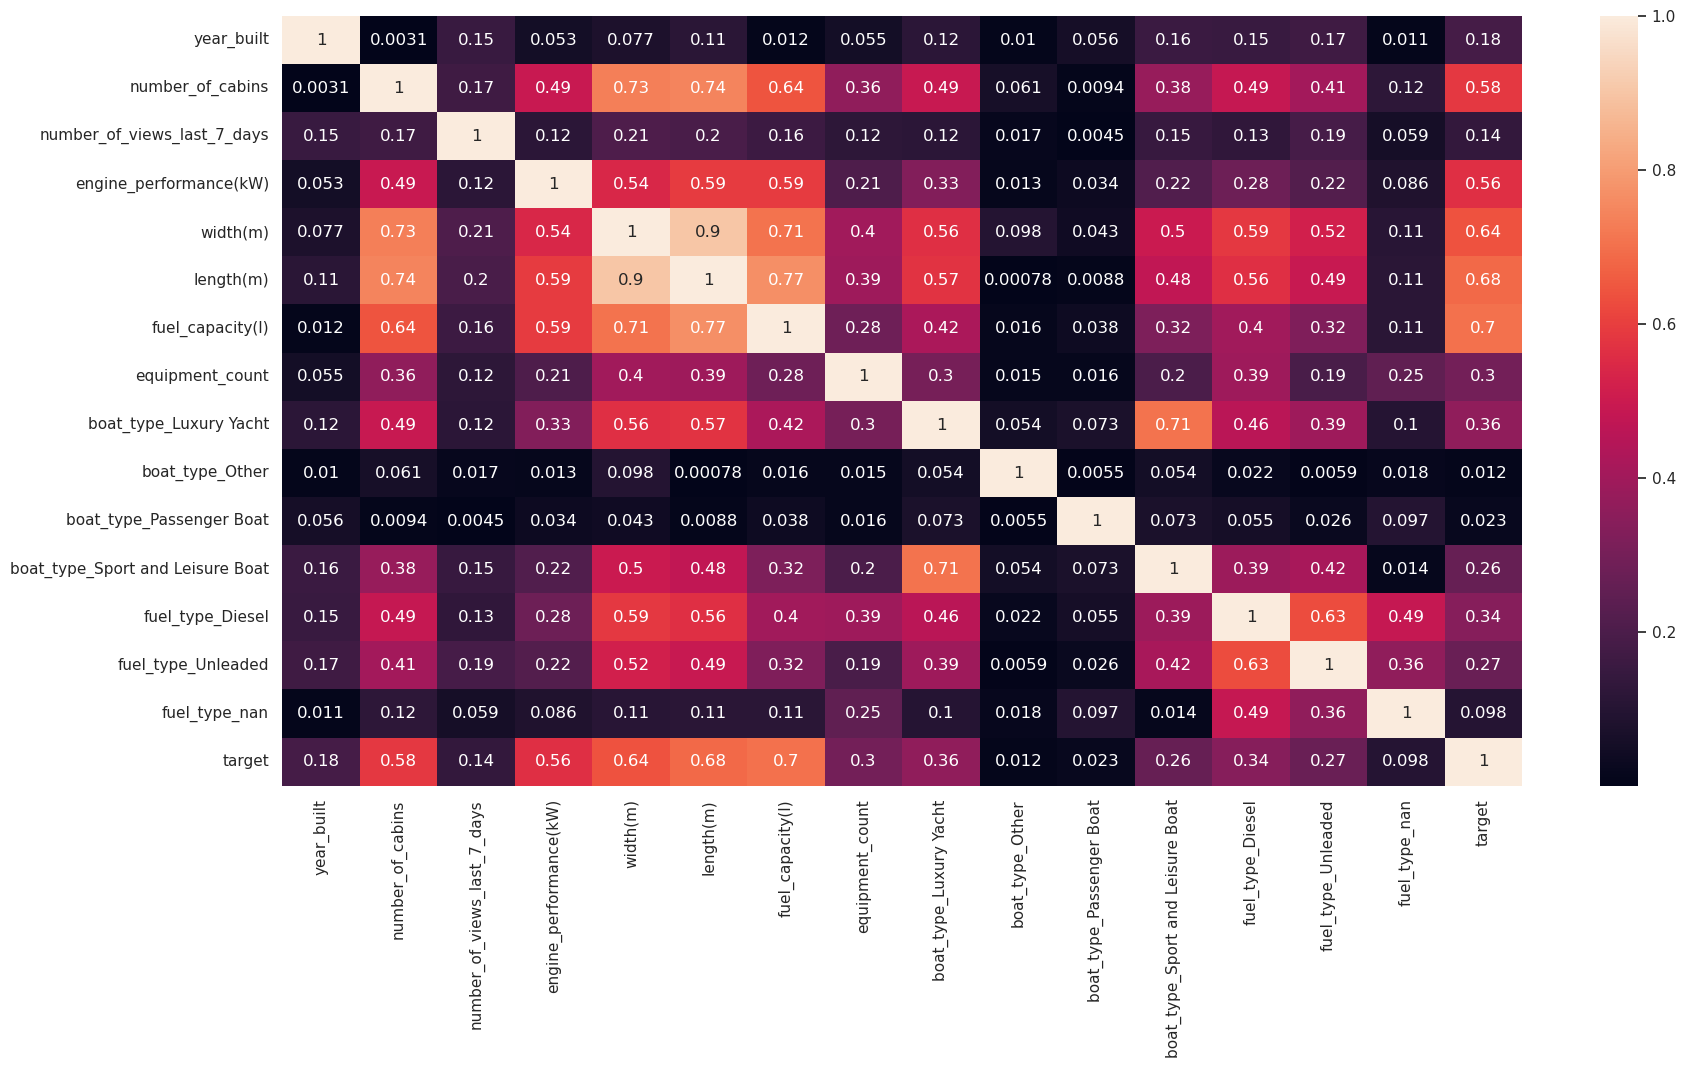

In [92]:
X_new = SelectKBest(score_func=f_classif, k=15).fit_transform(X, y)

selected_indices = SelectKBest(score_func=f_classif, k=15).fit(X, y).get_support(indices=True)

selected_columns = X.columns[selected_indices]

X_new_df = pd.DataFrame(X_new, columns=selected_columns)

X_new_df_with_target = pd.concat([X_new_df, y], axis=1)

plt.figure(figsize=(20, 10))
correlation_matrix = X_new_df_with_target.corr().abs()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [93]:
sorted_correlations = correlation_matrix['target'].sort_values(ascending=False)
sorted_correlations

target                              1.000000
fuel_capacity(l)                    0.702152
length(m)                           0.684891
width(m)                            0.637706
number_of_cabins                    0.583360
engine_performance(kW)              0.564526
boat_type_Luxury Yacht              0.360317
fuel_type_Diesel                    0.339065
equipment_count                     0.296399
fuel_type_Unleaded                  0.270674
boat_type_Sport and Leisure Boat    0.263224
year_built                          0.181588
number_of_views_last_7_days         0.137295
fuel_type_nan                       0.098431
boat_type_Passenger Boat            0.022697
boat_type_Other                     0.012251
Name: target, dtype: float64

After doing SelectKBest in the feature selection section, and conclusioning that the best k = 15, *fuel_capacity* has decreased in correlation having a positive one.
One last notice is that correlation actually is not directly dependent on the accuracy of the model. As an example *year_built* column, in the shap graphs has the highest position, though in the correlation graph, it has one of the last.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year_built                        9822 non-null   float64
 1   number_of_cabins                  9822 non-null   float64
 2   number_of_beds                    9822 non-null   float64
 3   number_of_views_last_7_days       9822 non-null   float64
 4   target                            9822 non-null   float64
 5   engine_hours(h)                   9822 non-null   float64
 6   engine_performance(kW)            9822 non-null   float64
 7   displacement(kg)                  9822 non-null   float64
 8   width(m)                          9822 non-null   float64
 9   depth(m)                          9822 non-null   float64
 10  length(m)                         9822 non-null   float64
 11  fuel_capacity(l)                  9822 non-null   float64
 12  equipm

It is good also to observe that a lot of features were removed or highly modified: original dataset has above 30 features, now the dataset has 25, but keep in mind that I've used one hot encoding for object features.